# Task2
### Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Data : Used cars data set
### This is complete analysis on used cars data of 13 cities and few brand models.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import warnings
warnings.filterwarnings("ignore")

### Problem Statement

#### How many used cars of different make and models, of different price ranges are availabel in different cities and states and how their prices are affected by other features of the car?


In [9]:
df = pd.read_csv("final_used_cars_data")
df.head()

Unnamed: 0      state   city  year  make     model transmission    fuel  \
0           0  CapitalUT  Delhi  2020  Ford  Ecosport       Manual  Diesel   
1           1  CapitalUT  Delhi  2016  Ford  Ecosport       Manual  Petrol   
2           2  CapitalUT  Delhi  2018  Ford  Ecosport       Manual  Diesel   
3           3  CapitalUT  Delhi  2019  Ford  Ecosport       Manual  Petrol   
4           4  CapitalUT  Delhi  2015  Ford  Ecosport    Automatic  Petrol   

  owner    emi  kilometers  mileage  seating   price  
0  1st   15425       96075        9        5  789000  
1  1st   10792       55017        9        5  552000  
2  1st   13978       24931        9        5  715000  
3  1st   15503       22270        9        5  793000  
4  2nd   10440       78906        9        5  534000

In [10]:
print(df.info)


<bound method DataFrame.info of       Unnamed: 0      state       city  year    make         model  \
0              0  CapitalUT      Delhi  2020    Ford      Ecosport   
1              1  CapitalUT      Delhi  2016    Ford      Ecosport   
2              2  CapitalUT      Delhi  2018    Ford      Ecosport   
3              3  CapitalUT      Delhi  2019    Ford      Ecosport   
4              4  CapitalUT      Delhi  2015    Ford      Ecosport   
...          ...        ...        ...   ...     ...           ...   
2885        2885  Karnataka  Bangalore  2019  Maruti   New Wagon-R   
2886        2886  Karnataka  Bangalore  2021  Maruti   New Wagon-R   
2887        2887  Karnataka  Bangalore  2019  Maruti   New Wagon-R   
2888        2888  Karnataka  Bangalore  2021  Maruti   New Wagon-R   
2889        2889  Karnataka  Bangalore  2022  Maruti   New Wagon-R   

     transmission    fuel owner    emi  kilometers  mileage  seating   price  
0          Manual  Diesel  1st   15425       960

#### Droping unnecessary column "Unnamed: 0"

In [11]:
df.drop("Unnamed: 0",axis=1,inplace=True)


In [12]:
data = pd.DataFrame({
    'city': ['Delhi', 'Mumbai', 'Kolkata', 'Kochi', 'Gurgaon', 'Ghaziabad',
             'Ahmedabad', 'Noida', 'Hyderabad', 'Indore', 'Lucknow', 'Pune',
             'Jaipur', 'Chennai', 'Bangalore'],
    'latitude': [28.7041, 19.0760, 22.5726, 9.9312, 28.4595, 28.6692,
                 23.0225, 28.5355, 17.3850, 22.7196, 26.8467, 18.5204,
                 26.9124, 13.0827, 12.9716],
    'longitude': [77.1025, 72.8777, 88.3639, 76.2673, 77.0266, 77.4538,
                  72.5714, 77.3910, 78.4867, 75.8577, 80.9462, 73.8567,
                  75.7873, 80.2707, 77.5946]
})

In [14]:
numerical_columns = [feature for feature in df.columns if df[feature].dtype !="O"]
categorical_columns = [feature for feature in df.columns if df[feature].dtype =="O"]

In [15]:
### Adding new column of make_model
df["make-model"] = df["make"] + df["model"]
df.head()

state   city  year  make     model transmission    fuel owner    emi  \
0  CapitalUT  Delhi  2020  Ford  Ecosport       Manual  Diesel  1st   15425   
1  CapitalUT  Delhi  2016  Ford  Ecosport       Manual  Petrol  1st   10792   
2  CapitalUT  Delhi  2018  Ford  Ecosport       Manual  Diesel  1st   13978   
3  CapitalUT  Delhi  2019  Ford  Ecosport       Manual  Petrol  1st   15503   
4  CapitalUT  Delhi  2015  Ford  Ecosport    Automatic  Petrol  2nd   10440   

   kilometers  mileage  seating   price    make-model  
0       96075        9        5  789000  FordEcosport  
1       55017        9        5  552000  FordEcosport  
2       24931        9        5  715000  FordEcosport  
3       22270        9        5  793000  FordEcosport  
4       78906        9        5  534000  FordEcosport

In [16]:
df.describe()

year           emi     kilometers      mileage      seating  \
count  2890.000000   2890.000000    2890.000000  2890.000000  2890.000000   
mean   2018.145329  13450.173010   40366.955017    14.079931     5.053979   
std       2.392801   5716.311029   24861.994630     2.660464     0.268051   
min    2010.000000   3715.000000       0.000000     9.000000     5.000000   
25%    2017.000000   9834.000000   19972.000000    12.000000     5.000000   
50%    2019.000000  11906.000000   36027.000000    15.000000     5.000000   
75%    2020.000000  15229.250000   58736.000000    16.000000     5.000000   
max    2022.000000  36983.000000  100245.000000    19.000000     7.000000   

              price  
count  2.890000e+03  
mean   6.949490e+05  
std    3.044222e+05  
min    1.900000e+05  
25%    5.030000e+05  
50%    6.090000e+05  
75%    7.790000e+05  
max    1.943000e+06

### Univariate analysis 

###  Categorical columns

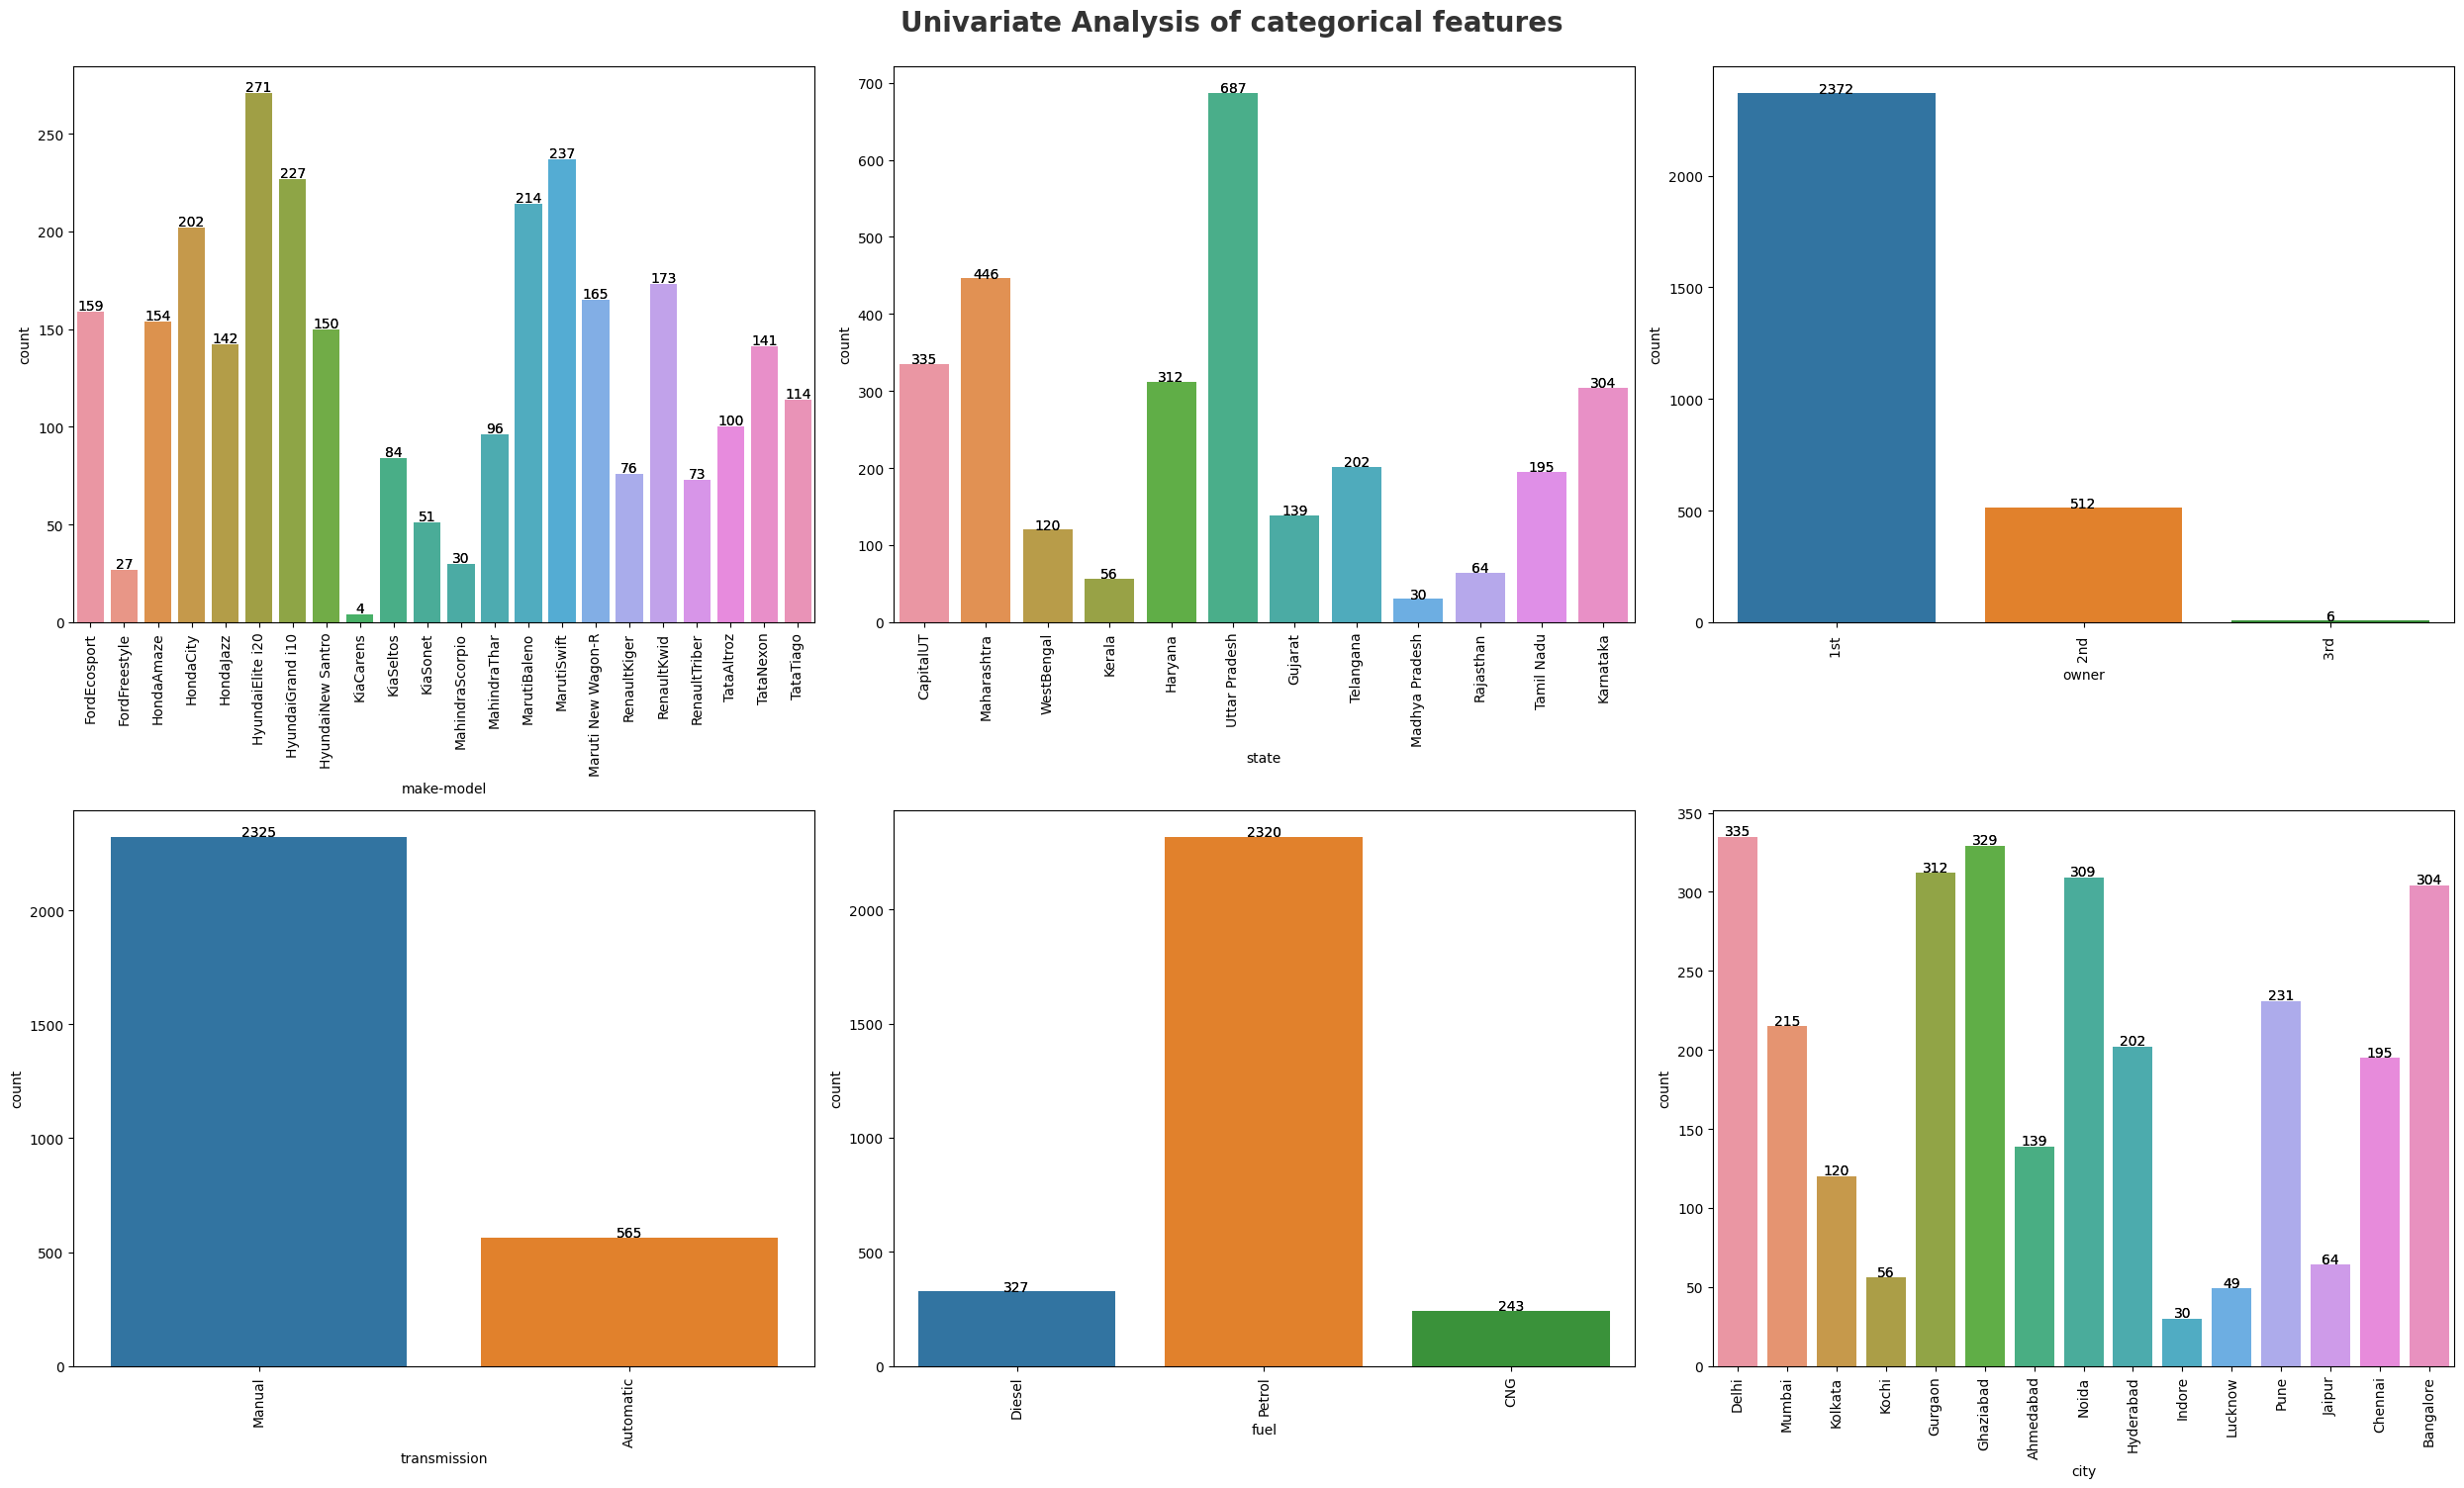

In [17]:
plt.figure(figsize=(25,15))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
cat1 = ["make-model","state","owner","transmission","fuel","city"]
for i in range(len(cat1)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[cat1[i]])
     # Add count values as text labels to the top of each bar
    for p in sns.countplot(x=df[cat1[i]]).patches:
        height = p.get_height()
        plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")
    plt.xlabel(cat1[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

- Maximum number of used cars are of Maruti and Hyundai .
- Minimum number of cars are of Kia andMahindra
- The Popular models are Baleno and swift of maruti and Elite i20 and Grand i10 of Hyundai.
- The least Popular models are carens of Kia and freestyle of ford.
- Above 2000 used cars have Manual transmission
- Around 800 cars have Automatic transmission
- Most of the used cars are Petrol based.
- Very few are Diesel and CNG based.
- Most of the used cars owner of first Type.

### Question1 : Which city People majority put their cars on sale?

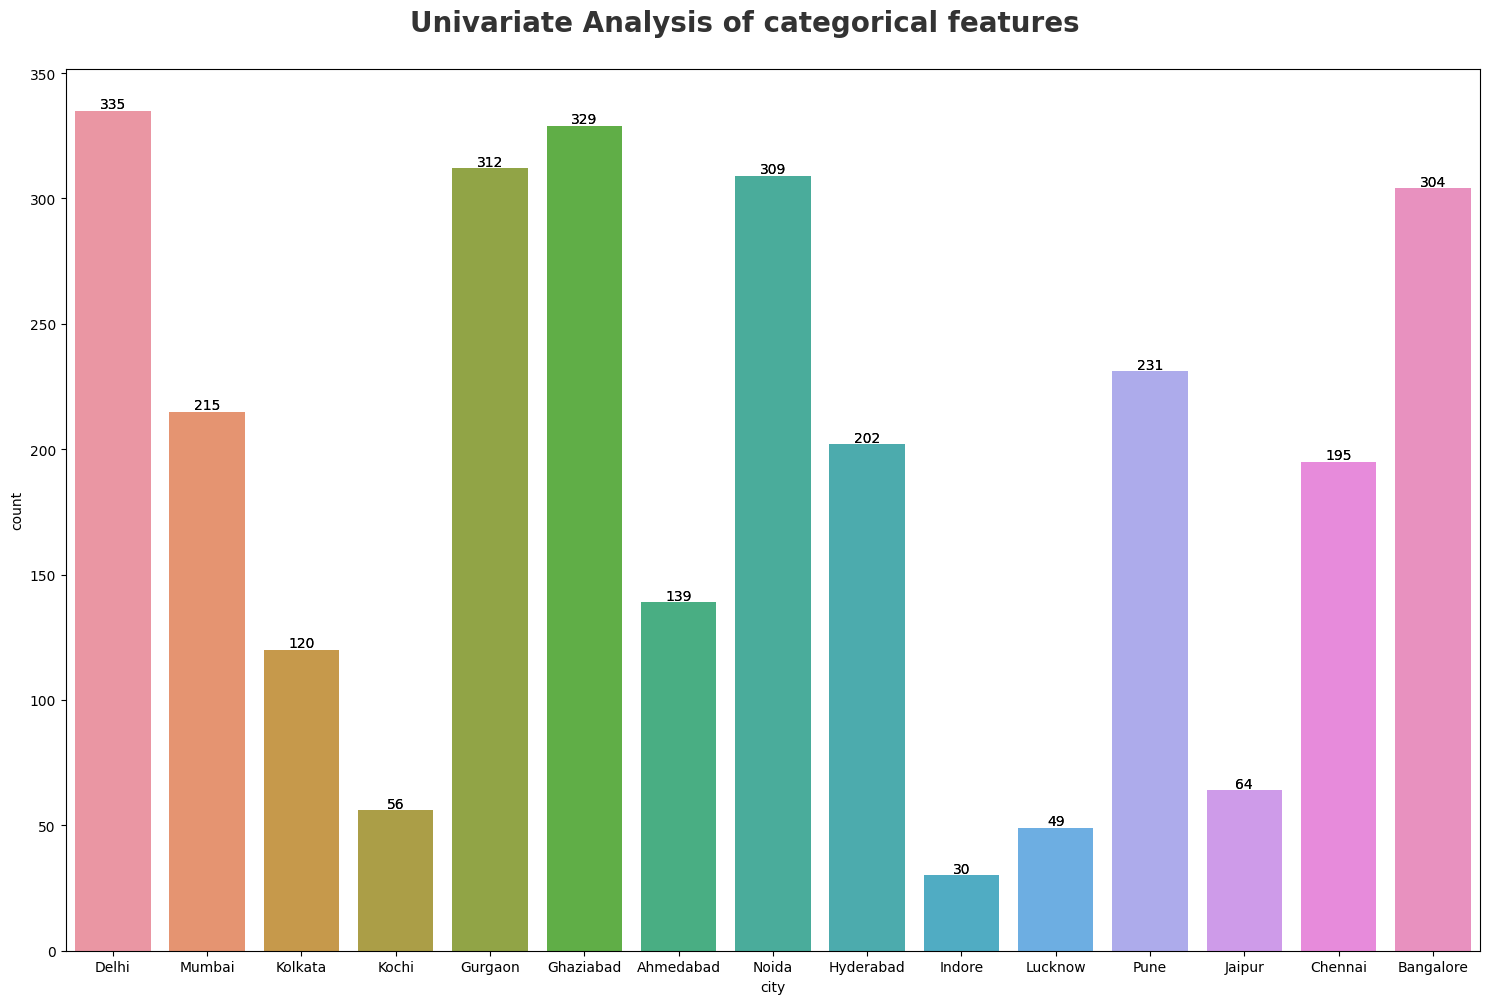

In [18]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.countplot(x=df["city"])
plt.xlabel("City")

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df["city"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question2: Which car brands are majority on sale?

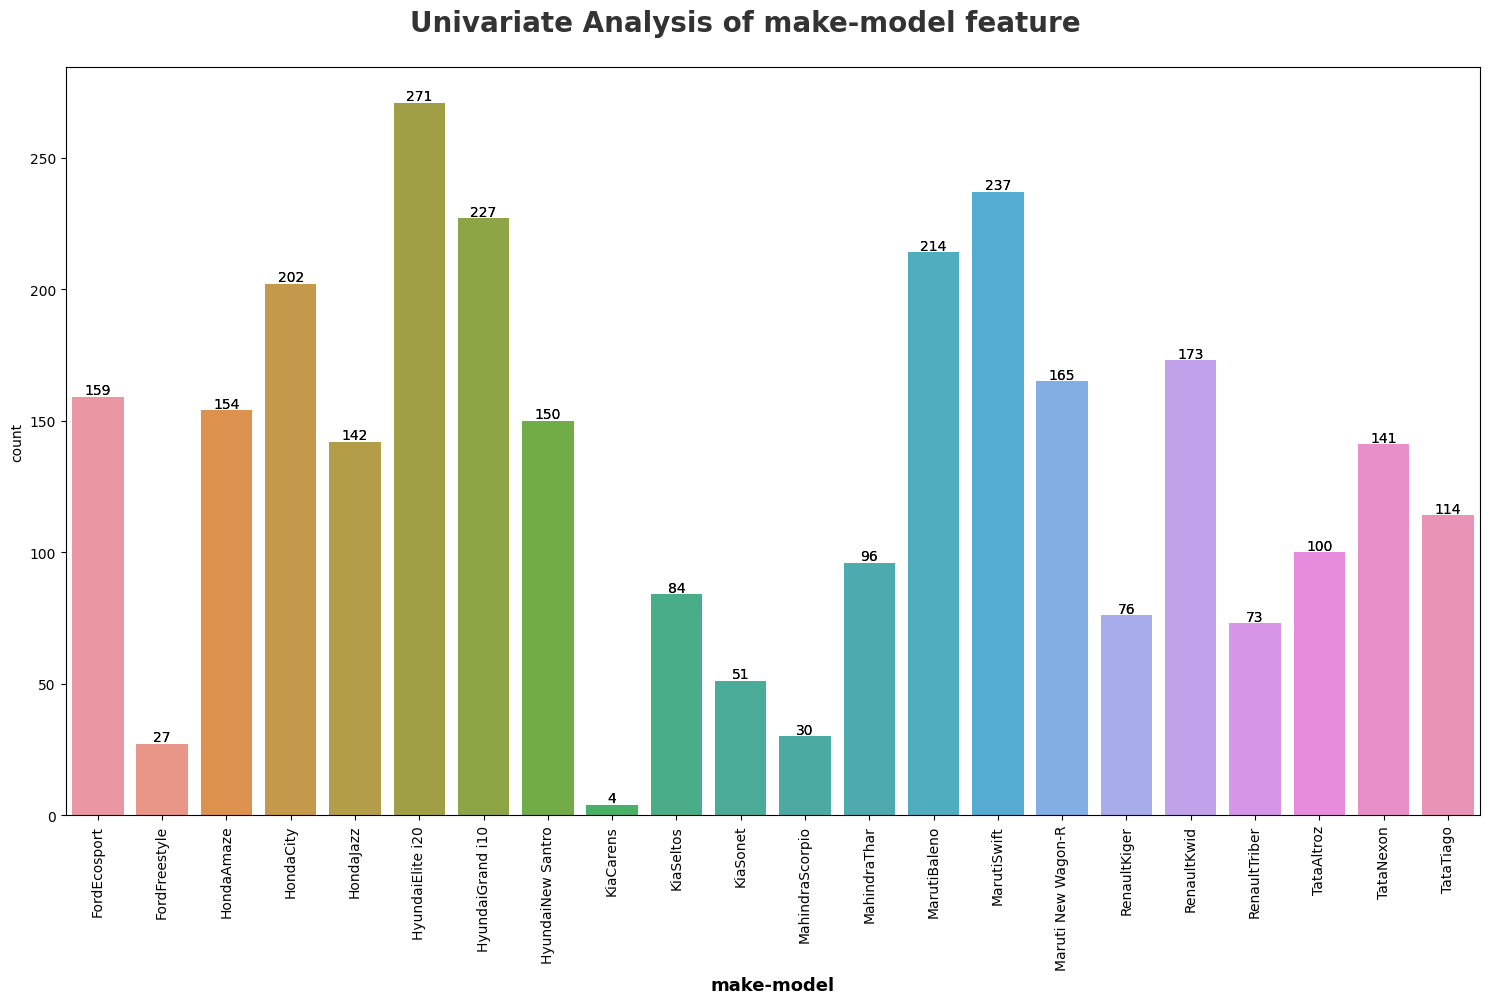

In [19]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of make-model feature",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.countplot(x=df["make-model"])
plt.xlabel("Brands",weight="bold",fontsize=13)

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df["make-model"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Question 3: Which Fuel type cars are Majority on sale?

In [20]:
df["fuel"].value_counts()

Petrol    2320
Diesel     327
CNG        243
Name: fuel, dtype: int64

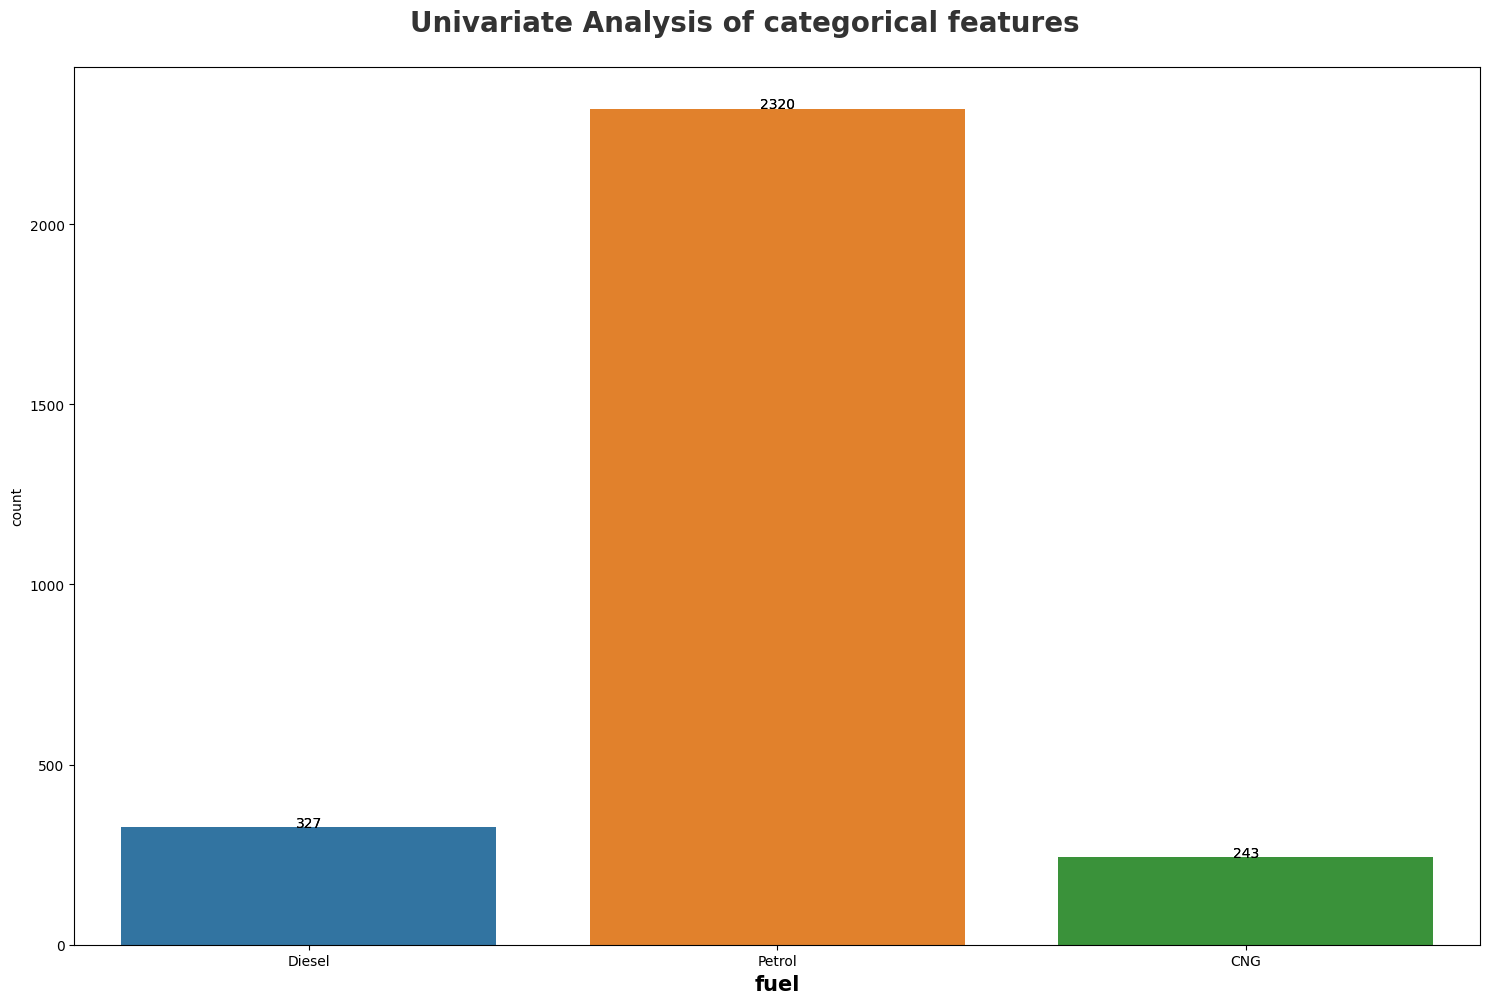

In [21]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.countplot(x=df["fuel"])
plt.xlabel("Fuel",weight="bold",fontsize=15)

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df["fuel"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 4:Which owner cars are majority on sale?

In [22]:
df["owner"].value_counts()

1st     2372
2nd      512
3rd        6
Name: owner, dtype: int64

In [23]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.pieplot(x=df["owner"])
plt.xlabel("Owner",weight="bold",fontsize=15)

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df["owner"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: module 'seaborn' has no attribute 'pieplot'

<Figure size 1500x1000 with 0 Axes>

### Question 5: Which yearmanufactured cars are more on resale?

In [ ]:
sns.boxplot(x=df['year'])

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.countplot(x=df["year"])
plt.xlabel("Year")

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df["year"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 6: Which brand of cars have more price?

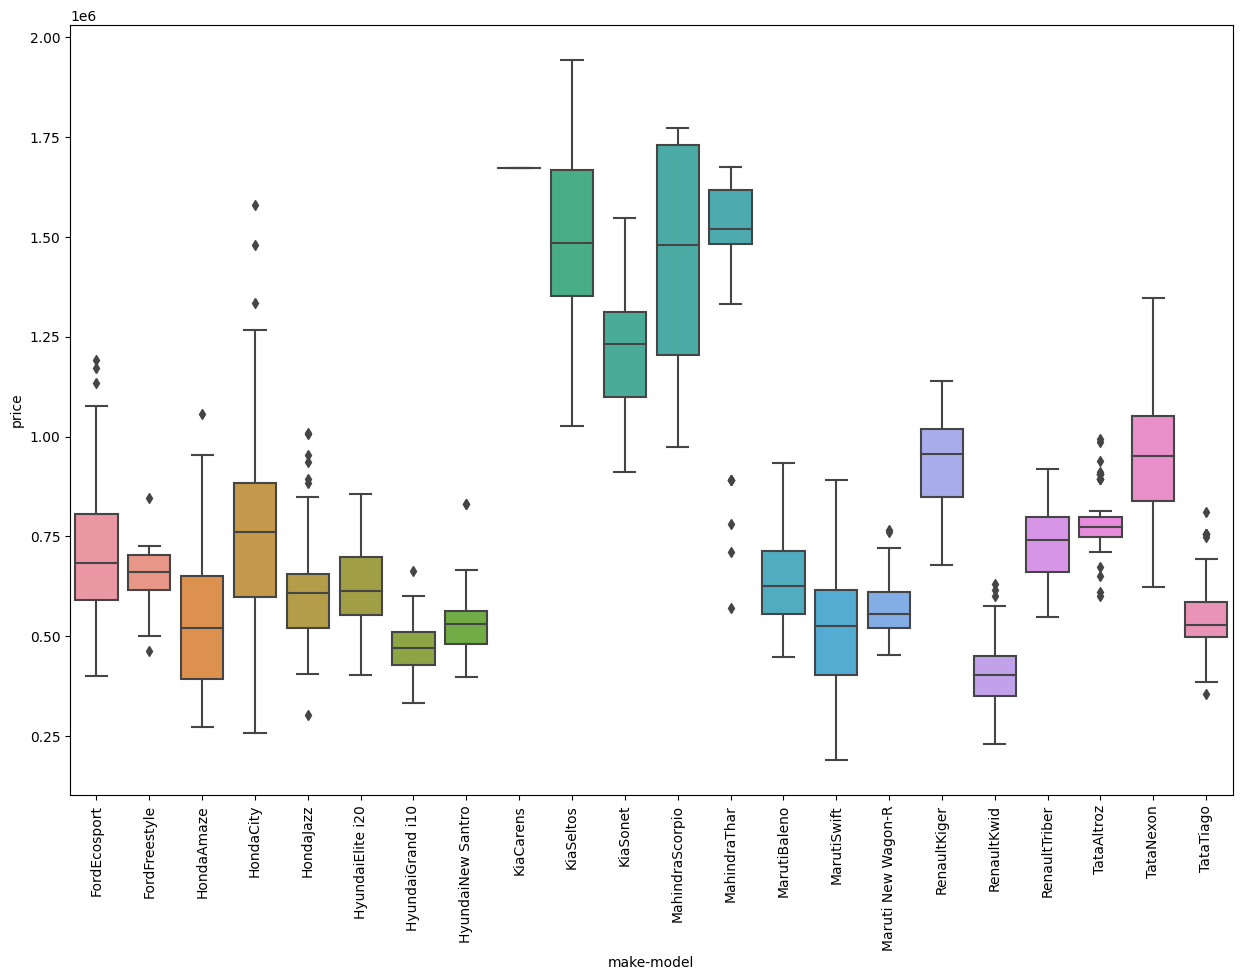

In [24]:
plt.figure(figsize=(15,10))
fig =sns.boxplot(x=df["make-model"],y=df["price"])
plt.xticks(rotation=90)
plt.show()

### Numerical Columns

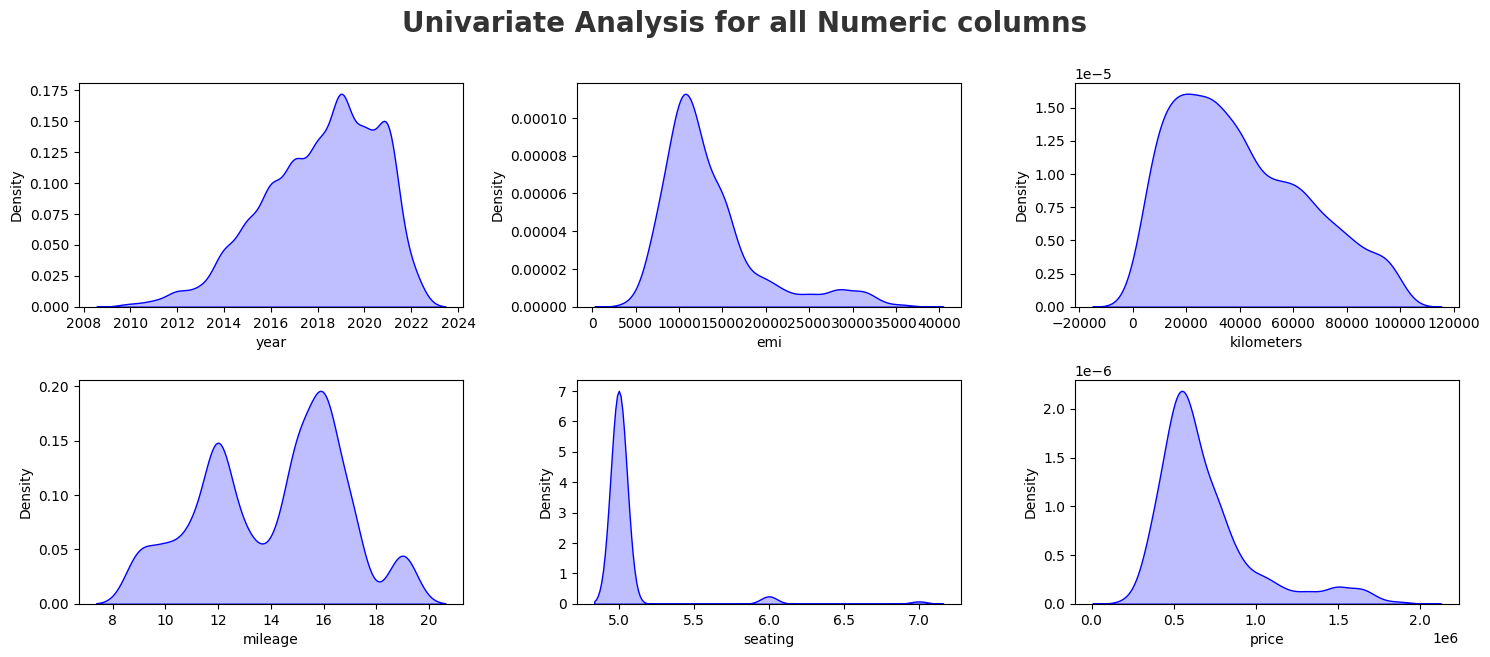

In [25]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
for i in range(len(numerical_columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_columns[i]],shade=True,color="blue")
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

- Maximum used cars are between 2018 and 2022 models
- Minimum used cars are between 2008 and 2014 models
- Most of the used cars are between 20000 and 40000 kilometers driven.
- Maximum used cars mileage is 12km/lt and 16km/lt.
- Maximum used cars of 5 seater only.
- Maximum used cars emi is between 10000 to 15000
- very few cars are above 20000
- Maximum used cars have price range between 5 to 7 lakhs
- Otlierrs price range are above 12 lakhs.

### Percentage of used cars based on the companies.

In [26]:
df["make"].value_counts()

Hyundai     648
Maruti      616
Honda       498
Tata        355
Renault     322
Ford        186
Kia         139
Mahindra    126
Name: make, dtype: int64

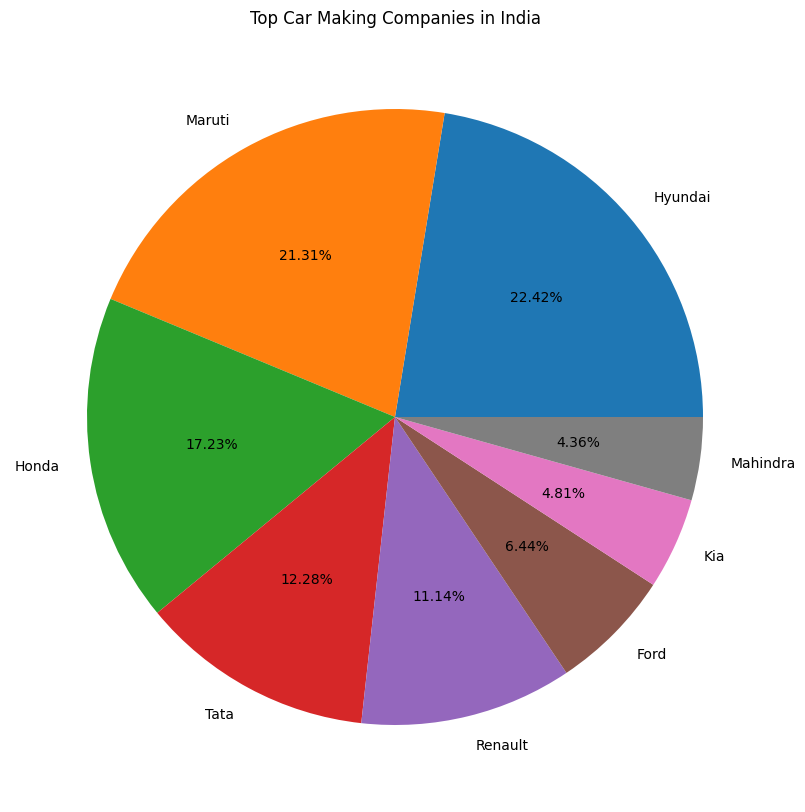

In [27]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.make.value_counts().plot(ax=ax, kind='pie',autopct="%.2f%%")
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

- The top used cars companies are Maruti, Hyundai and Honda.
- Kia and Mahindra have the lowest percentage of used cars

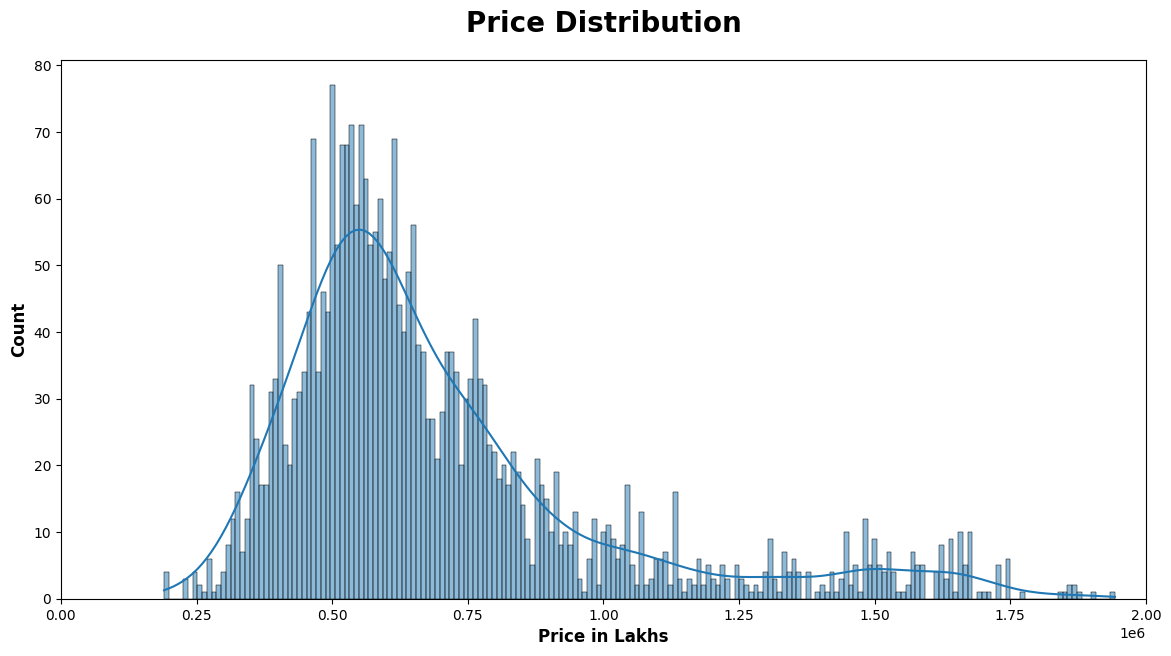

In [28]:
plt.subplots(figsize=(14,7))
sns.histplot(df.price,bins=200,kde = True)
plt.title("Price Distribution",weight = "bold",fontsize=20,pad=20)
plt.ylabel("Count",weight="bold",fontsize=12)
plt.xlabel("Price in Lakhs",weight="bold",fontsize=12)
plt.xlim(0,2000000)
plt.show()

### Question 6: How many cars are below 5lakhs budget in different cities

In [29]:
df1 = df[df["price"] <= 500000]
df1.head()

state   city  year   make  model transmission    fuel owner   emi  \
23  CapitalUT  Delhi  2017  Honda  Amaze       Manual  Petrol  1st   8876   
25  CapitalUT  Delhi  2014  Honda  Amaze       Manual  Petrol  1st   7058   
27  CapitalUT  Delhi  2014  Honda  Amaze       Manual  Petrol  2nd   6706   
28  CapitalUT  Delhi  2014  Honda  Amaze       Manual  Petrol  1st   6862   
31  CapitalUT  Delhi  2016  Honda  Amaze       Manual  Petrol  1st   8700   

    kilometers  mileage  seating   price  make-model  
23       47020       17        5  454000  HondaAmaze  
25       17106       17        5  361000  HondaAmaze  
27       44282       17        5  343000  HondaAmaze  
28       77120       17        5  351000  HondaAmaze  
31       92420       17        5  445000  HondaAmaze

In [30]:
pd.DataFrame(df1["city"].value_counts())

city
Delhi        83
Ghaziabad    76
Noida        76
Gurgaon      75
Kolkata      65
Mumbai       62
Pune         58
Hyderabad    36
Bangalore    33
Ahmedabad    29
Kochi        23
Jaipur       23
Chennai      20
Lucknow      14
Indore       12

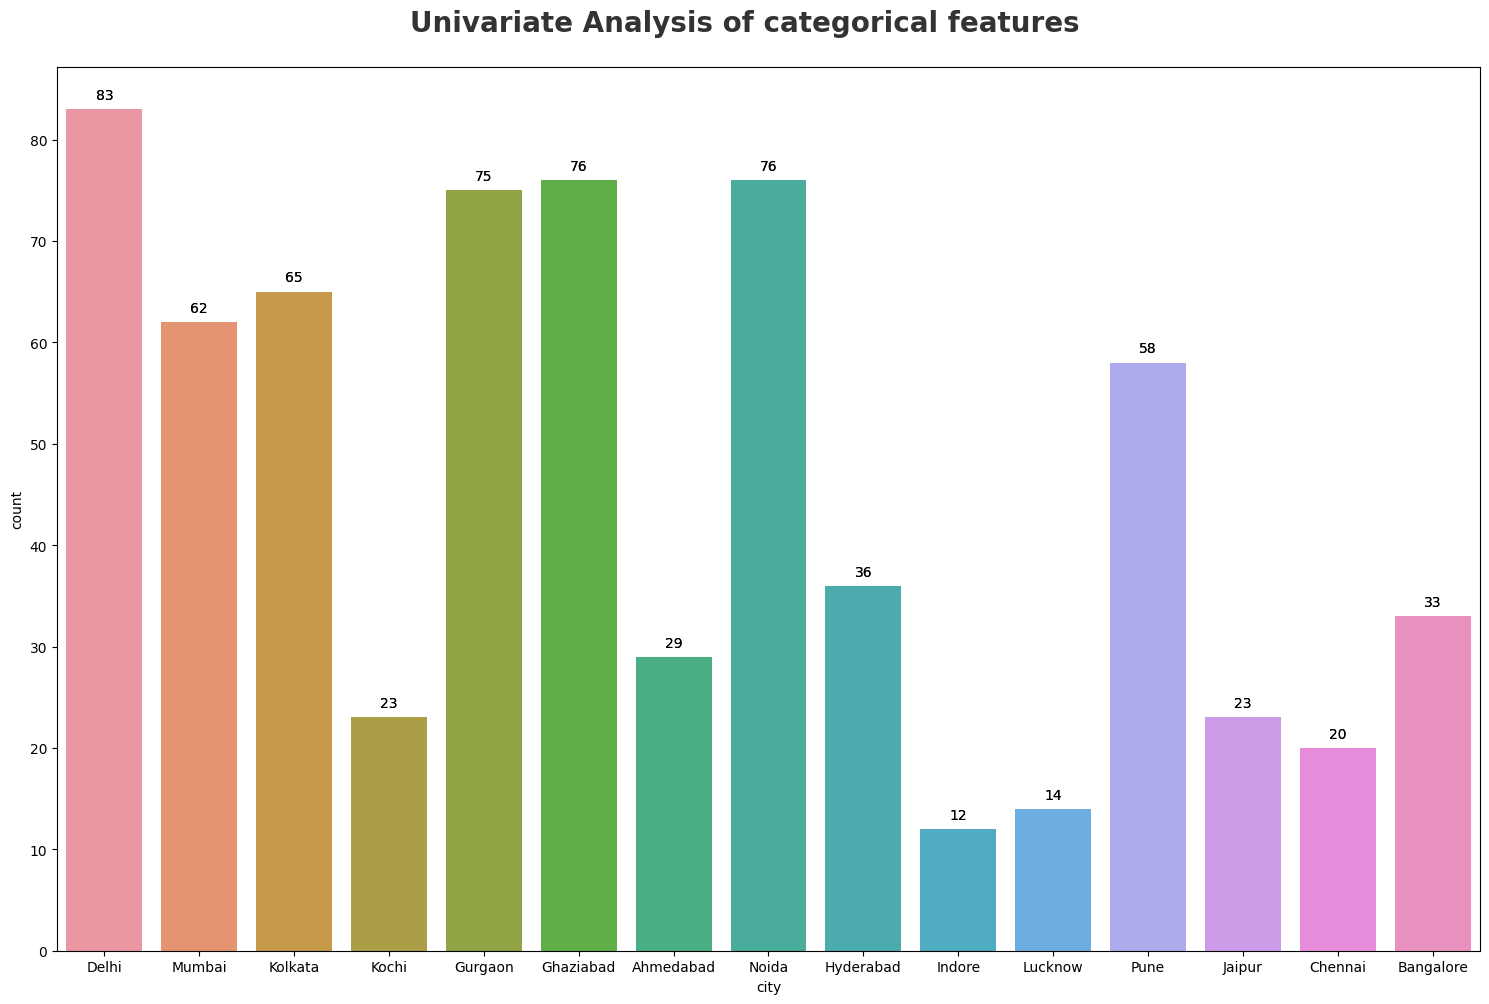

In [31]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.countplot(x=df1["city"])
plt.xlabel("City")

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df1["city"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Question 7: How Many cars of each model which are below 5lakhs budget?

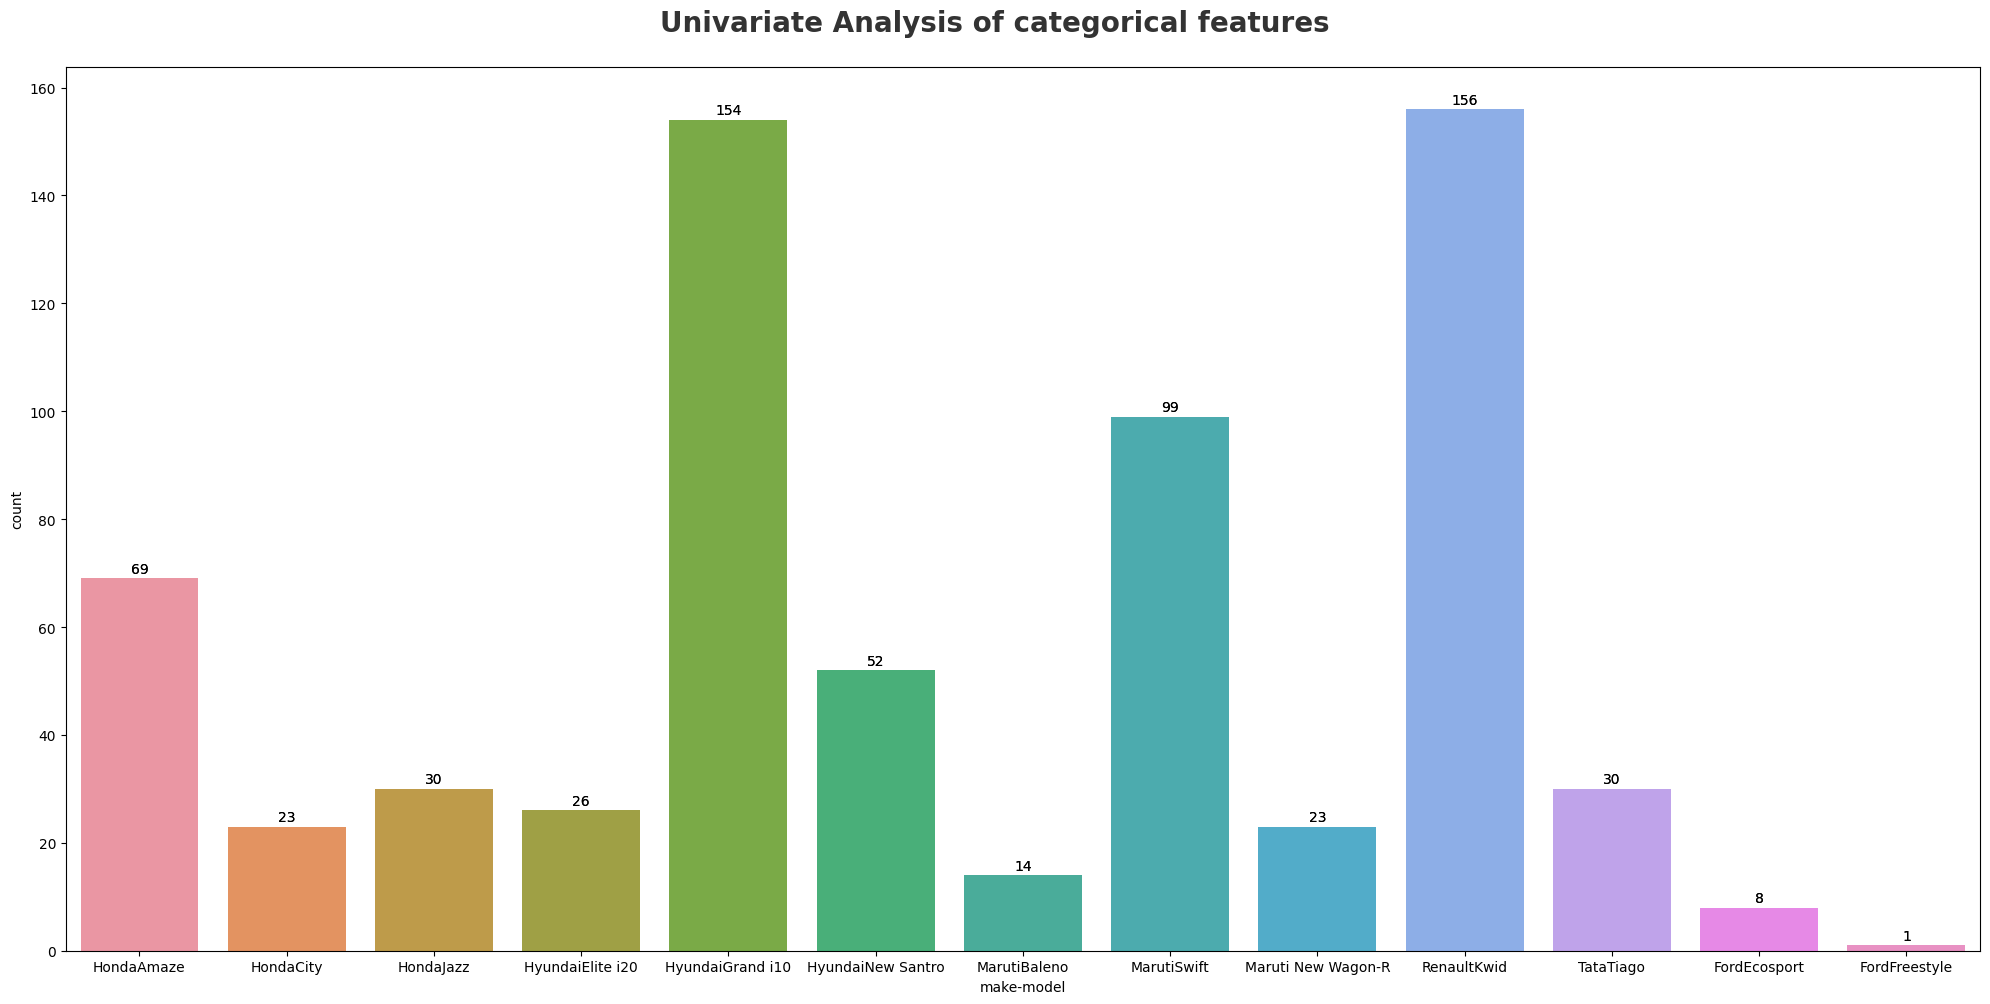

In [32]:
plt.figure(figsize=(20,10))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.countplot(x=df1["make-model"])
plt.xlabel("make-model")

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df1["make-model"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
df2 = df[(df["price"] >= 500000) | (df["price"]<= 1000000)]
df2.head()

state   city  year  make     model transmission    fuel owner    emi  \
0  CapitalUT  Delhi  2020  Ford  Ecosport       Manual  Diesel  1st   15425   
1  CapitalUT  Delhi  2016  Ford  Ecosport       Manual  Petrol  1st   10792   
2  CapitalUT  Delhi  2018  Ford  Ecosport       Manual  Diesel  1st   13978   
3  CapitalUT  Delhi  2019  Ford  Ecosport       Manual  Petrol  1st   15503   
4  CapitalUT  Delhi  2015  Ford  Ecosport    Automatic  Petrol  2nd   10440   

   kilometers  mileage  seating   price    make-model  
0       96075        9        5  789000  FordEcosport  
1       55017        9        5  552000  FordEcosport  
2       24931        9        5  715000  FordEcosport  
3       22270        9        5  793000  FordEcosport  
4       78906        9        5  534000  FordEcosport

###  Question 8: How Many cars which are above 5lakhs and below 10lakhs budget in different cities?

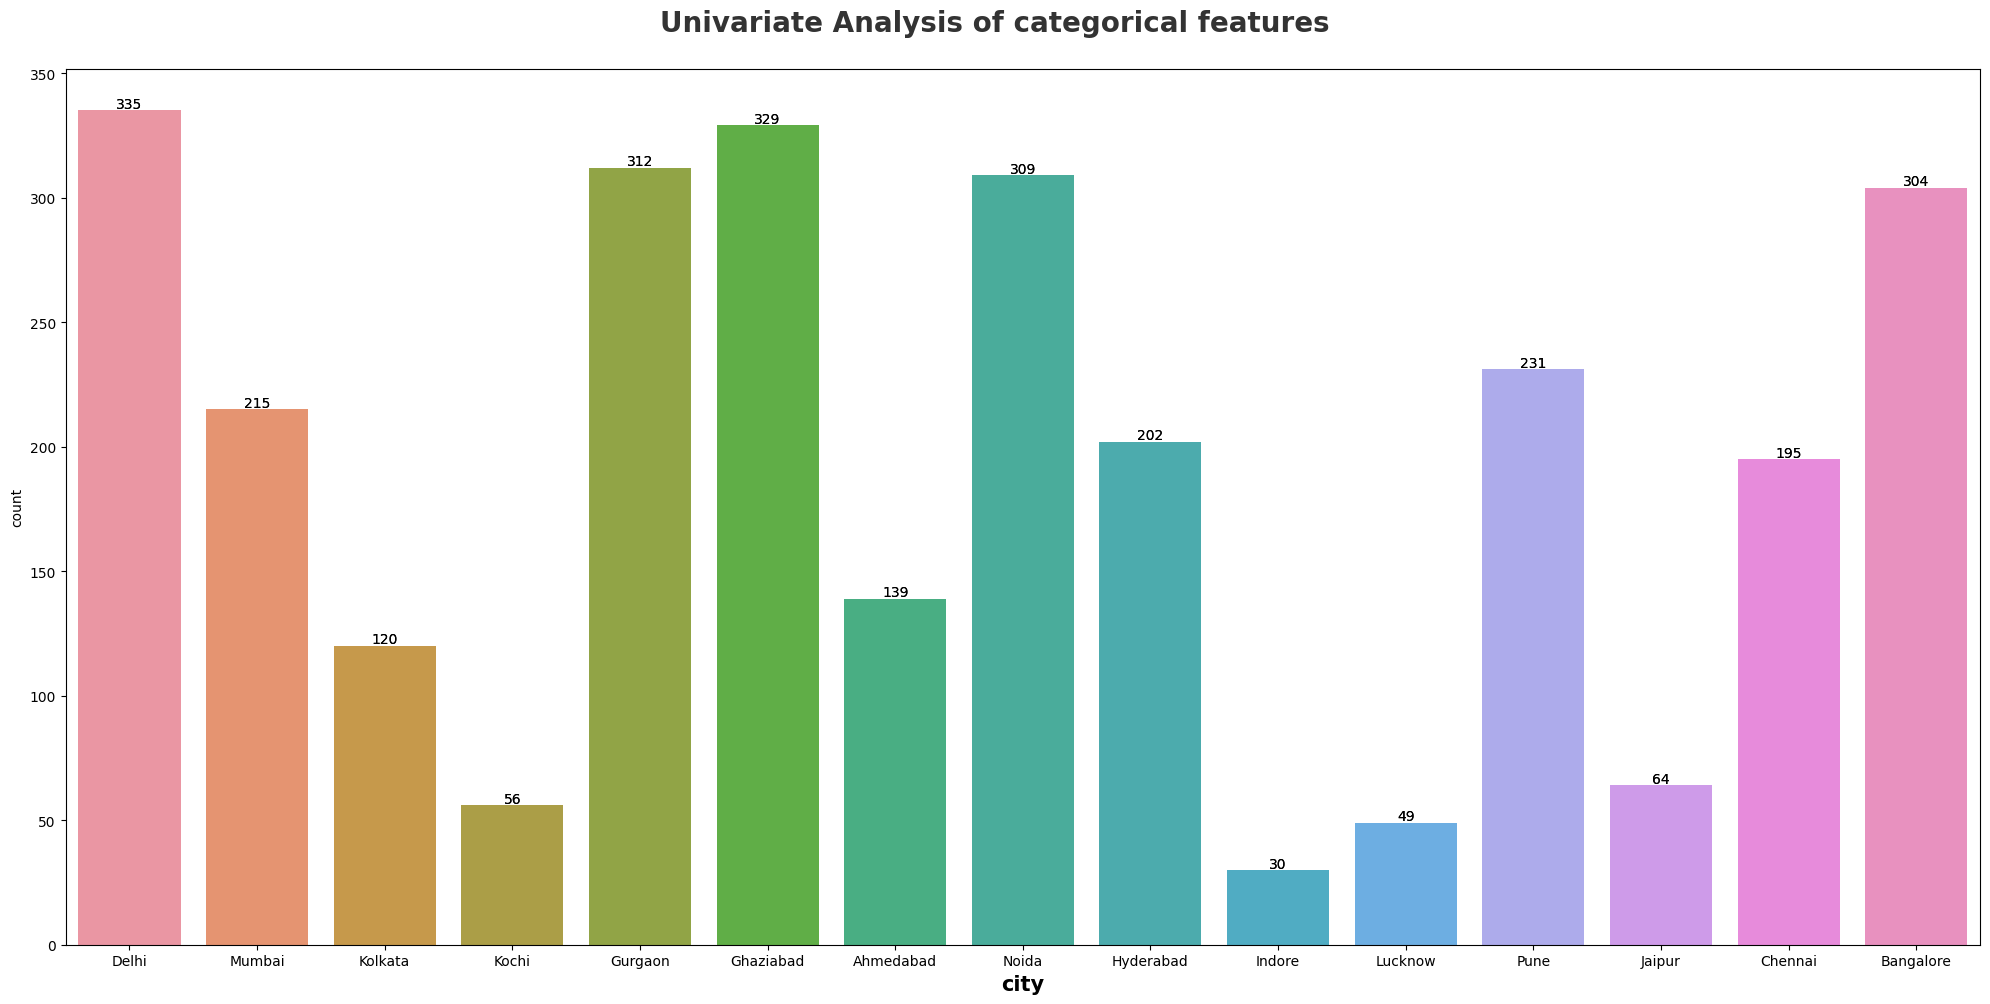

In [34]:
plt.figure(figsize=(20,10))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.countplot(x=df2["city"])
plt.xlabel("City",weight="bold",fontsize=15)

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df2["city"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Question 9: How Many cars of each make-model which are below 5lakhs  and above 10lakhs budget?

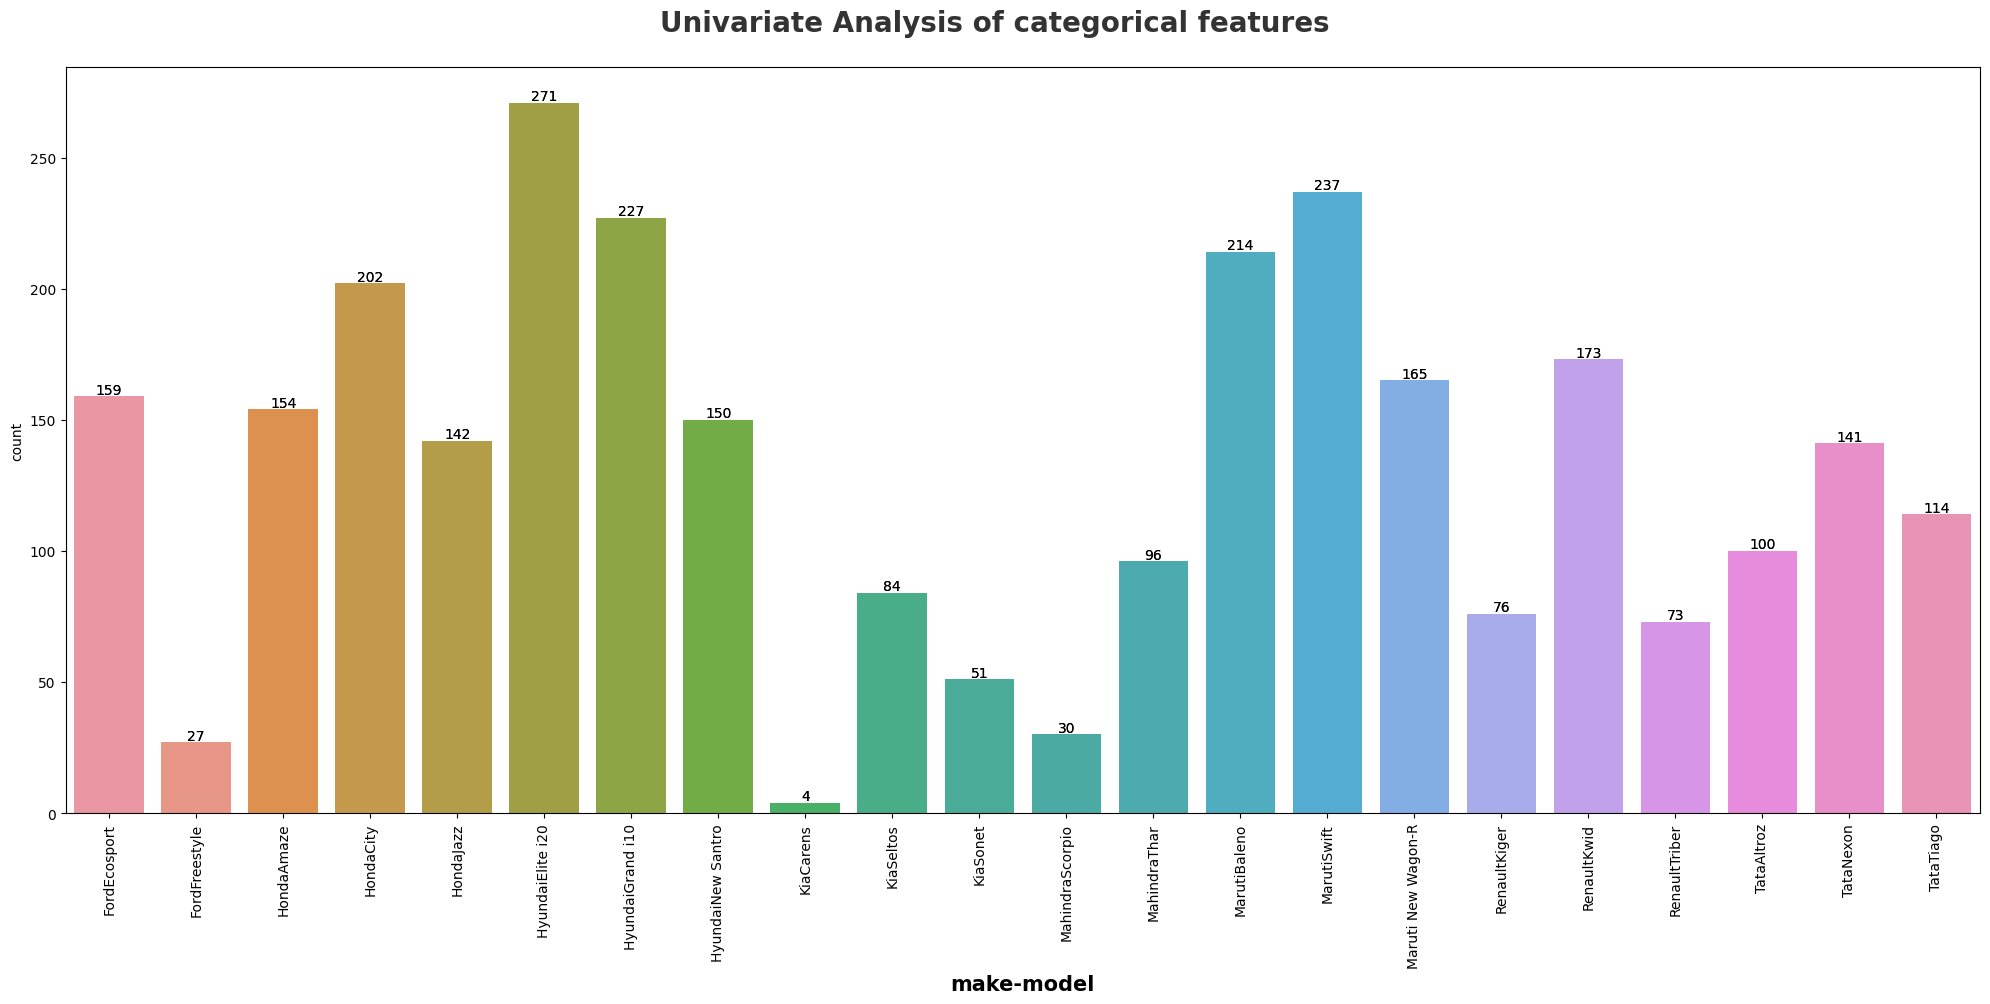

In [35]:
plt.figure(figsize=(20,10))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.countplot(x=df2["make-model"])
plt.xlabel("Make-Model",weight ="bold",fontsize=15)

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df2["make-model"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

###  Question 10: How Many cars of each model which are above 10lakhs budget?

In [36]:
df3 = df[(df["price"] > 1000000)]
df3.head()

state   city  year   make   model transmission    fuel owner    emi  \
45   CapitalUT  Delhi  2021  Honda    City       Manual  Petrol  1st   20385   
51   CapitalUT  Delhi  2021  Honda    City       Manual  Petrol  1st   21509   
138  CapitalUT  Delhi  2022    Kia  Carens       Manual  Petrol  1st   31825   
139  CapitalUT  Delhi  2021    Kia  Seltos       Manual  Diesel  1st   27066   
140  CapitalUT  Delhi  2020    Kia  Seltos    Automatic  Petrol  1st   31844   

     kilometers  mileage  seating    price make-model  
45         5785       16        5  1071000  HondaCity  
51         6989       16        5  1130000  HondaCity  
138        3084        9        5  1672000  KiaCarens  
139       60147       10        5  1422000  KiaSeltos  
140        9417       10        5  1673000  KiaSeltos

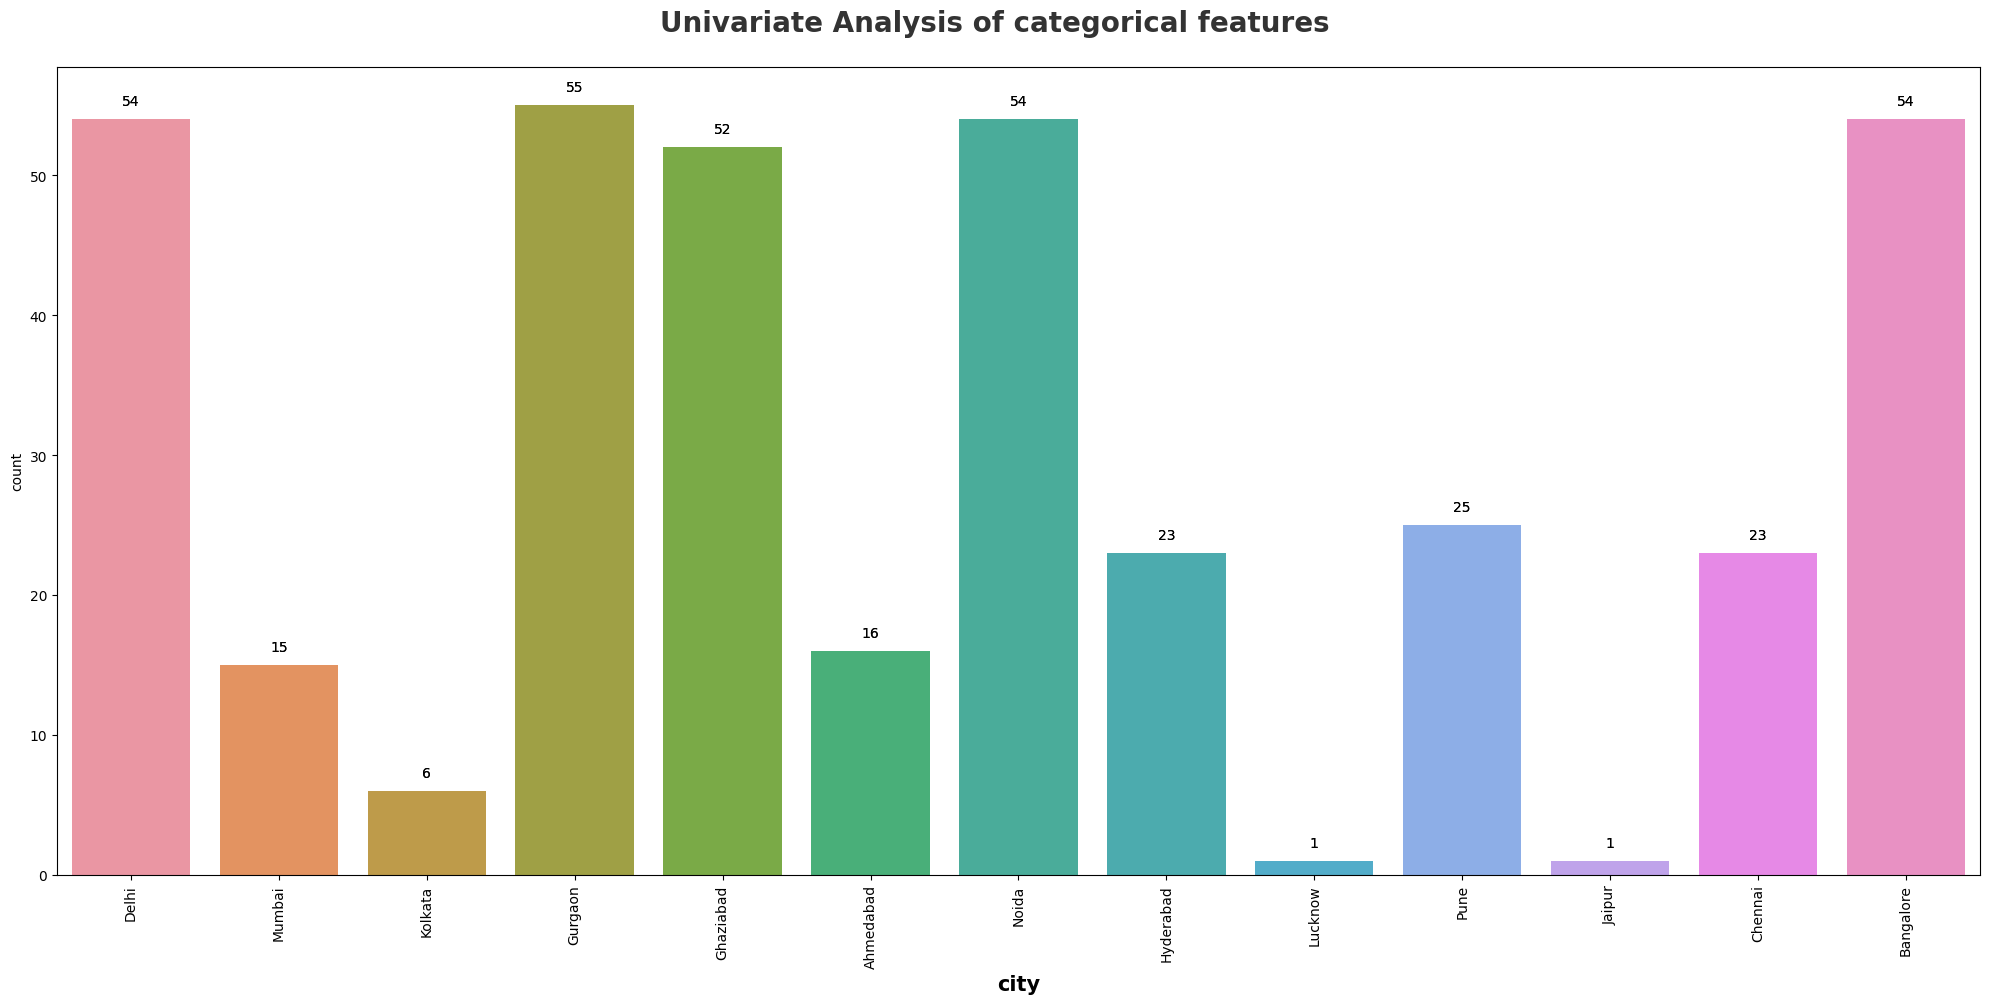

In [37]:
plt.figure(figsize=(20,10))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.countplot(x=df3["city"])
plt.xlabel("City",weight="bold",fontsize=15)

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df3["city"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

###  Question 12: How Many cars of each model which are above 10lakhs budget?

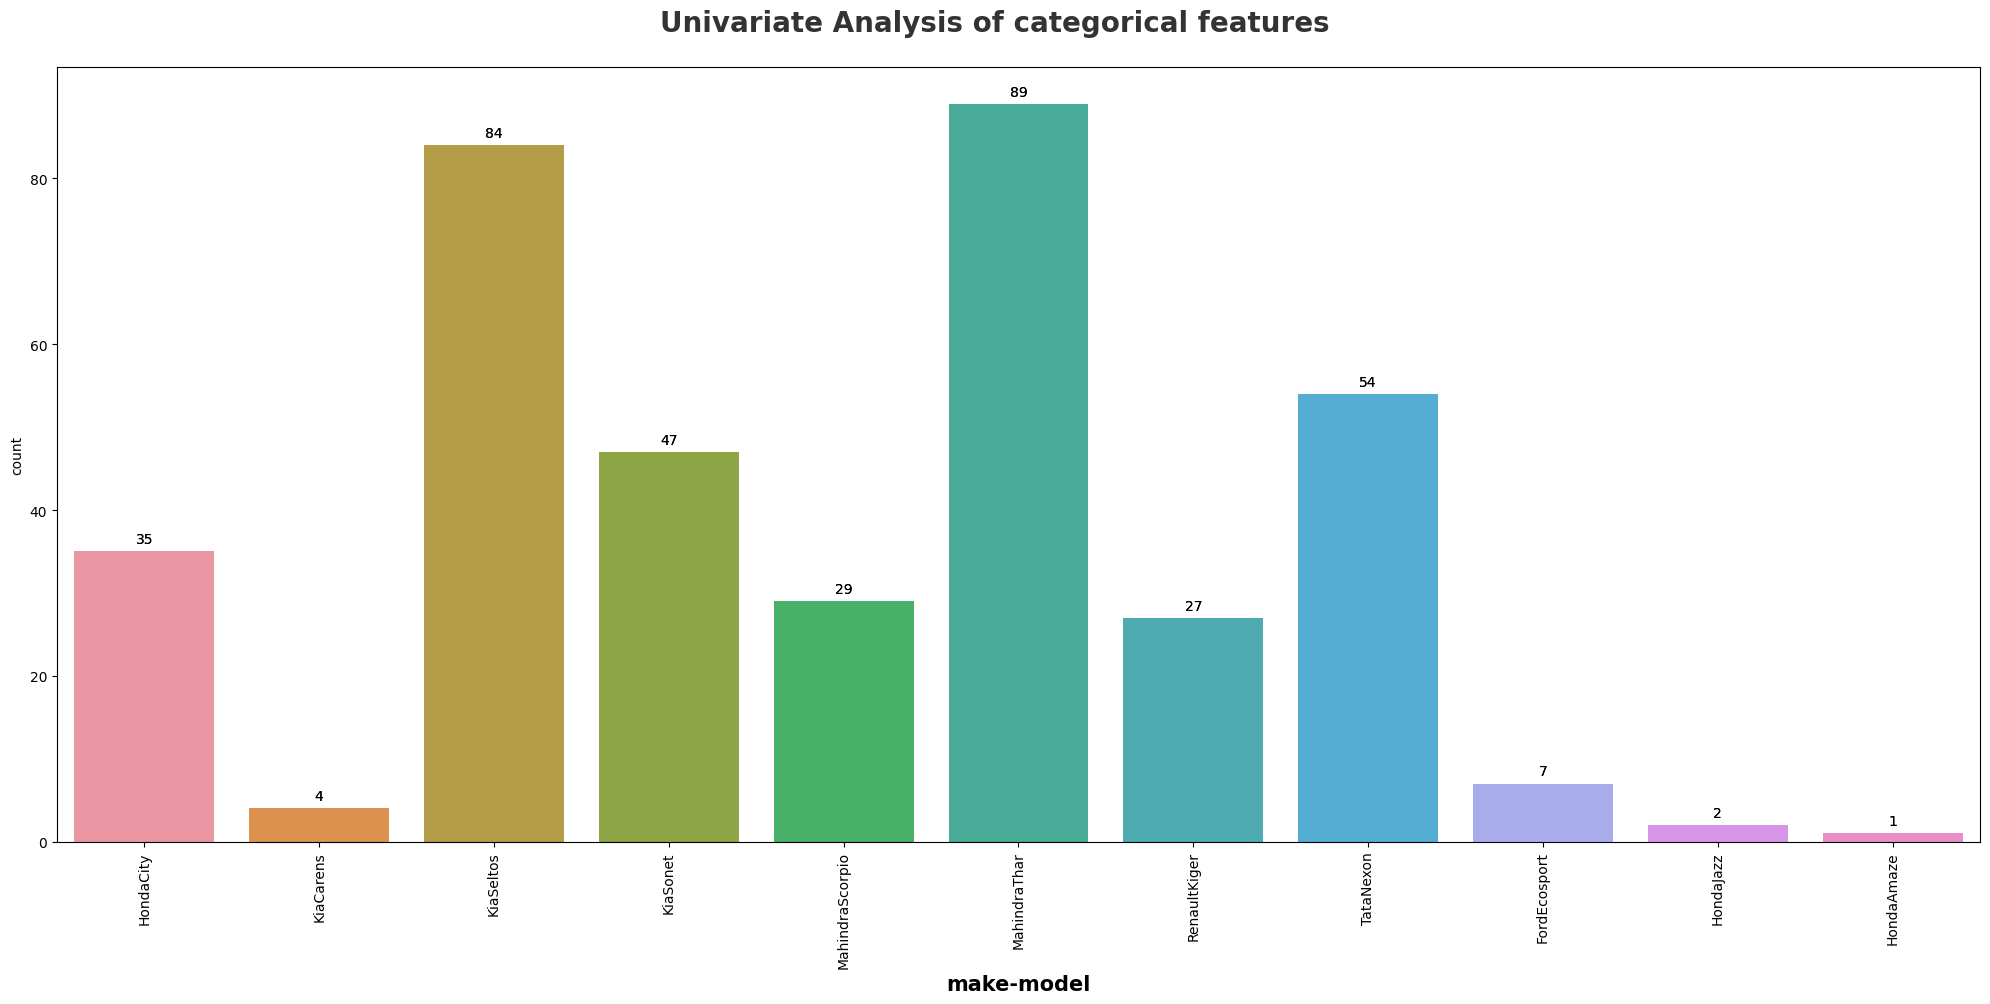

In [38]:
plt.figure(figsize=(20,10))
plt.suptitle("Univariate Analysis of categorical features",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
sns.countplot(x=df3["make-model"])
plt.xlabel("Make-Model",weight="bold",fontsize=15)

# Add count values as text labels to the top of each bar
for p in sns.countplot(x=df3["make-model"]).patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Bivariate and multi variate analysis

### Categorical vs Numerical

###  Queston 1: How does the price of used cars varies in different states ?

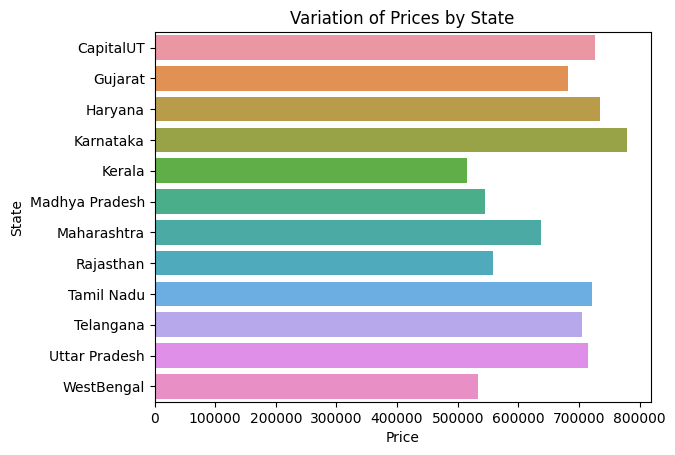

In [39]:
# state vs Price

class_counts = df.groupby("state")["price"].mean()

# Plot the horizontal bar chart
sns.barplot( class_counts.values,class_counts.index,orient="h")
plt.title('Variation of Prices by State')
plt.xlabel('Price')
plt.ylabel('State')
#plt.yticks(rotation=6)
plt.show()

###  Queston 2: How does the price of used cars varies in different cities ?

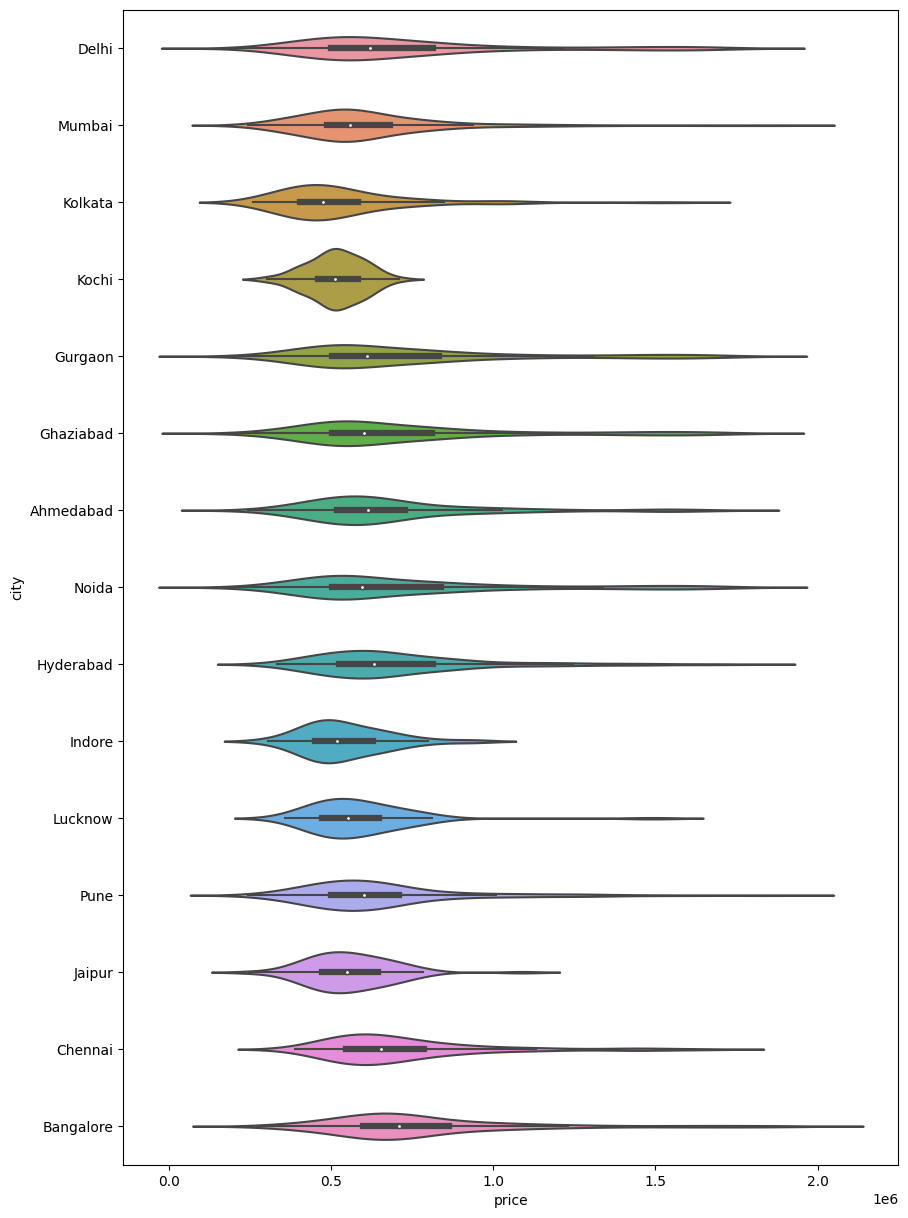

In [40]:
# City vs Price

plt.figure(figsize=(10,15))
fig =sns.violinplot(x=df["price"],y=df["city"])

### Transmission vs Price

In [41]:
df.groupby("transmission")["price"].mean()

transmission
Automatic    874021.504425
Manual       651432.516129
Name: price, dtype: float64

### Question 3: How the price of used cars price  varies with transmission?

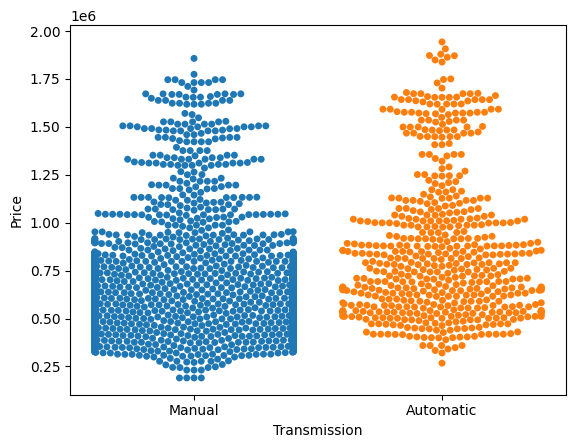

In [42]:
### It shows average price
sns.swarmplot(x=df["transmission"], y=df["price"], data=df)
plt.xlabel("Transmission")
plt.ylabel("Price")

plt.show()


- Automatic cars have higher average price than manual cars.


### Question 4: How the price of used cars varies with fuel type?

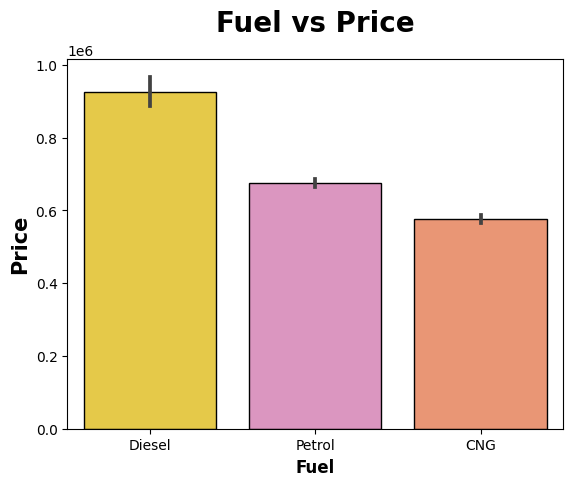

In [43]:
### It shows average price
sns.barplot(x=df["fuel"], y=df["price"], data=df,ec="black",palette="Set2_r")
plt.xlabel("Fuel",weight="bold",fontsize=12)
plt.ylabel("Price",weight="bold",fontsize=15)
plt.title("Fuel vs Price",weight="bold",fontsize=20,pad=20)
plt.show()


- Diesel based used cars are more expensive compared to others.
- CNG based used cars are least expensive.


### Question 5: How the price of used cars varies with Owner type?

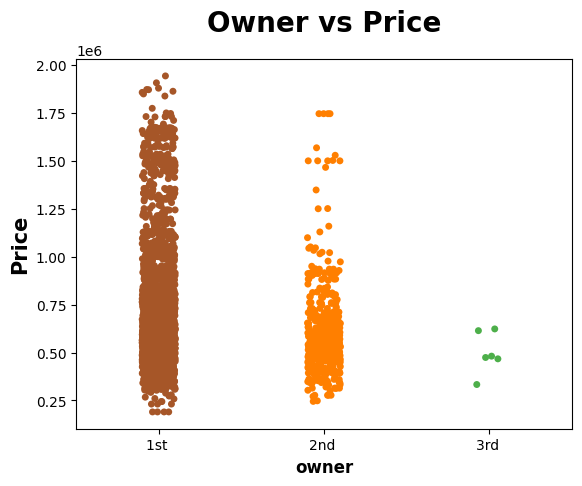

In [44]:
### It shows average price
sns.stripplot(x=df["owner"], y=df["price"], data=df,ec="black",palette="Set1_r")
plt.xlabel("owner",weight="bold",fontsize=12)
plt.ylabel("Price",weight="bold",fontsize=15)
plt.title("Owner vs Price",weight="bold",fontsize=20,pad=20)
plt.show()


 - Based on the owner type price is changing.
 - If the owner type changes from 1st to other the price is decreasing.

### Numerical vs Numerical

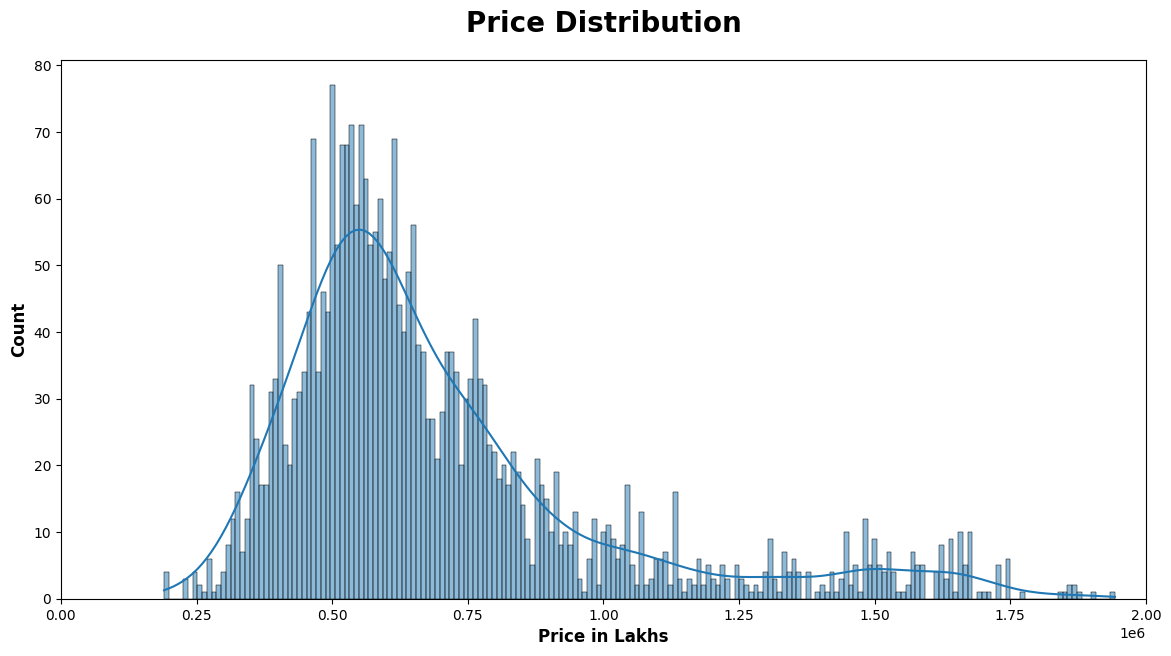

In [45]:
plt.subplots(figsize=(14,7))
sns.histplot(df.price,bins=200,kde = True)
plt.title("Price Distribution",weight = "bold",fontsize=20,pad=20)
plt.ylabel("Count",weight="bold",fontsize=12)
plt.xlabel("Price in Lakhs",weight="bold",fontsize=12)
plt.xlim(0,2000000)
plt.show()

### Question 1: How the prices varying based on kilometers?

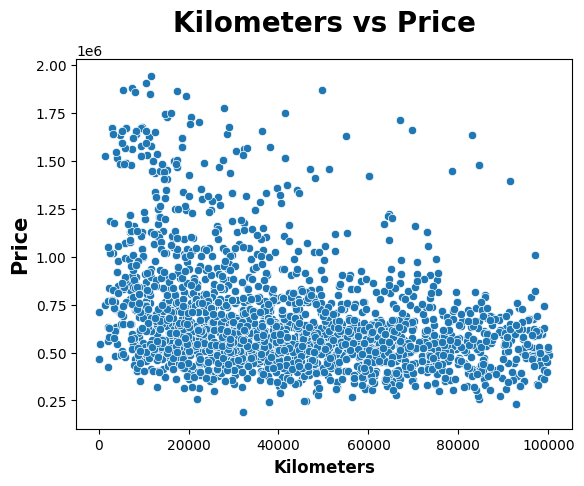

In [46]:
### It shows average price
sns.scatterplot(x=df["kilometers"], y=df["price"], data=df,palette="Set2_r")
plt.xlabel("Kilometers",weight="bold",fontsize=12)
plt.ylabel("Price",weight="bold",fontsize=15)
plt.title("Kilometers vs Price",weight="bold",fontsize=20,pad=20)
plt.show()

- If the car has diven more kilometers, it's price will be decreased.

### Question 2: How the prices varying based on year?

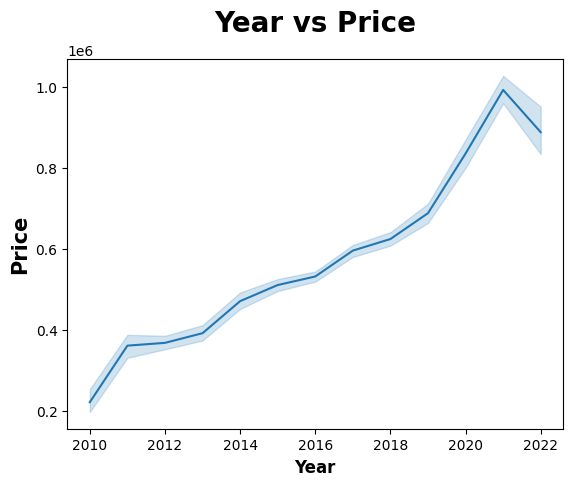

In [47]:
### It shows average price
sns.lineplot(x=df["year"], y=df["price"], data=df,palette="Set2_r")
plt.xlabel("Year",weight="bold",fontsize=12)
plt.ylabel("Price",weight="bold",fontsize=15)
plt.title("Year vs Price",weight="bold",fontsize=20,pad=20)
plt.show()

- If the year is increasing, the price is also increasing.

### Question 3: How the prices varying based on seating?

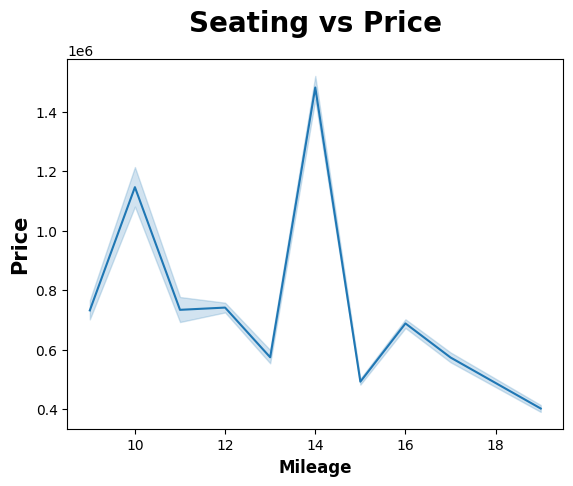

In [48]:
### It shows average price
sns.lineplot(x=df["mileage"], y=df["price"], data=df,palette="Set2_r")
plt.xlabel("Mileage",weight="bold",fontsize=12)
plt.ylabel("Price",weight="bold",fontsize=15)
plt.title("Seating vs Price",weight="bold",fontsize=20,pad=20)
plt.show()

- As the number of seats are increased the price will also increase.

### Question 4: How the prices varying based on emi?

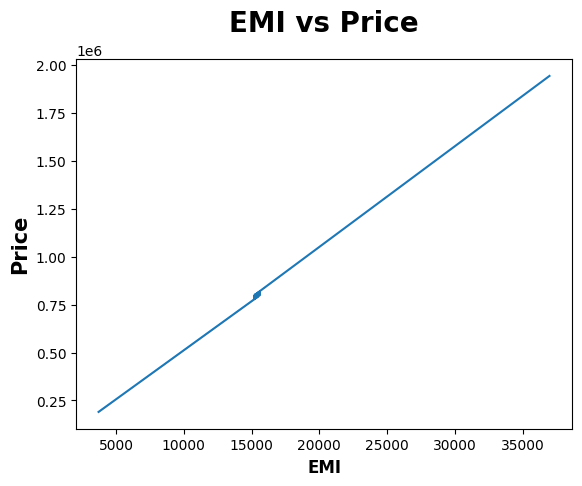

In [49]:
### It shows average price
sns.lineplot(x=df["emi"], y=df["price"], data=df,palette="Set2_r")
plt.xlabel("EMI",weight="bold",fontsize=12)
plt.ylabel("Price",weight="bold",fontsize=15)
plt.title("EMI vs Price",weight="bold",fontsize=20,pad=20)
plt.show()

- If the price of used cars are increases , the emi will also crease.

### Multivariate Analysis

### Relation between multiple features of used cars

In [50]:
df[numerical_columns].corr()

year       emi  kilometers   mileage   seating     price
year        1.000000  0.543336   -0.549130 -0.139391  0.163158  0.541217
emi         0.543336  1.000000   -0.378007 -0.354027  0.515203  0.999822
kilometers -0.549130 -0.378007    1.000000  0.025589 -0.126771 -0.378496
mileage    -0.139391 -0.354027    0.025589  1.000000 -0.006052 -0.351136
seating     0.163158  0.515203   -0.126771 -0.006052  1.000000  0.515758
price       0.541217  0.999822   -0.378496 -0.351136  0.515758  1.000000

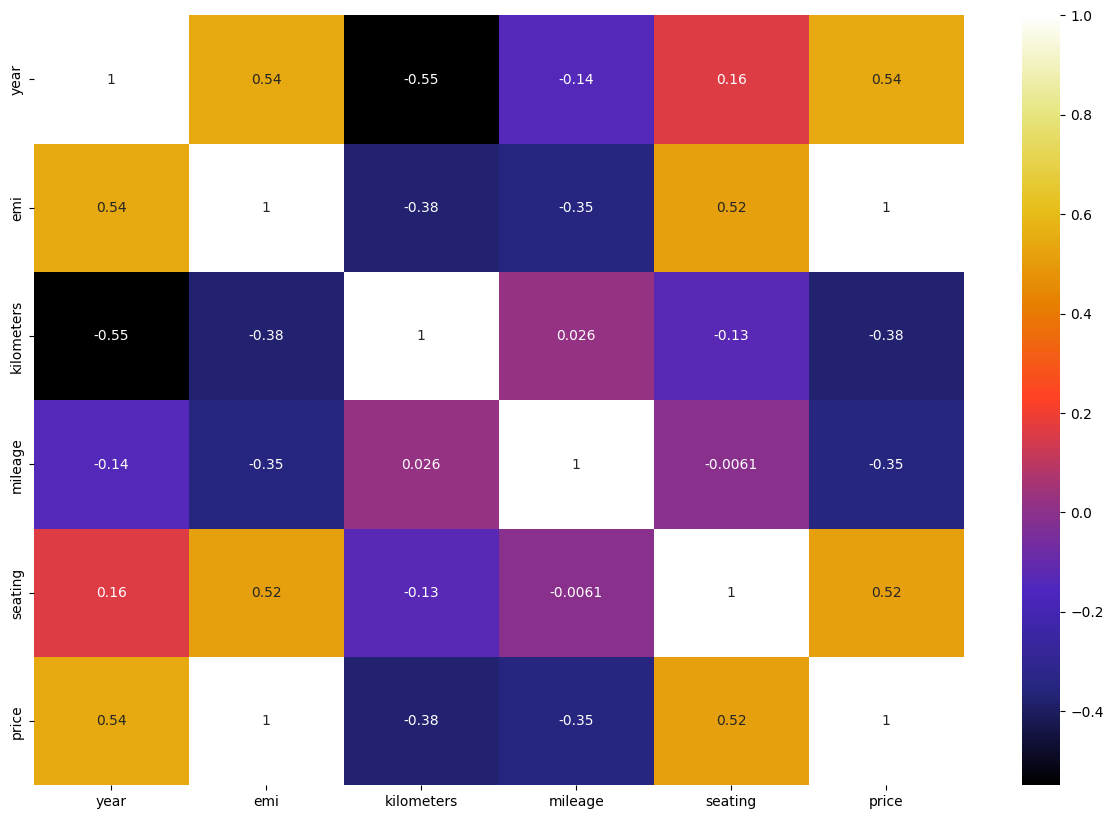

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True)
plt.show()

- EMI is strongly positively correlated with price.
- Year and seating are positively correlated with price.
- Kilometers and Mileage are negatively correlated with price.

### Variation of price with mileage of different models

In [52]:
fig = px.scatter_3d(df, x='mileage', z='price', y='fuel',color='make-model',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

###  Conclusion
#### How many used cars are for sale in different cities and states ?
#### How Many cars available in different cities with different price ranges?
#### how many cars are available of different make-model in different price ranges?
#### How the used cars price is affeected by different features?

In [7]:
pd.crosstab(index=df[df["price"]<=500000],columns=df["fuel"])

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [13]:
df1= df[df["price"]<=500000]
df1

state       city  year    make  model transmission    fuel owner  \
23    CapitalUT      Delhi  2017   Honda  Amaze       Manual  Petrol  1st    
25    CapitalUT      Delhi  2014   Honda  Amaze       Manual  Petrol  1st    
27    CapitalUT      Delhi  2014   Honda  Amaze       Manual  Petrol  2nd    
28    CapitalUT      Delhi  2014   Honda  Amaze       Manual  Petrol  1st    
31    CapitalUT      Delhi  2016   Honda  Amaze       Manual  Petrol  1st    
...         ...        ...   ...     ...    ...          ...     ...   ...   
2845  Karnataka  Bangalore  2011  Maruti  Swift       Manual  Diesel  2nd    
2846  Karnataka  Bangalore  2015  Maruti  Swift       Manual  Petrol  2nd    
2850  Karnataka  Bangalore  2014  Maruti  Swift       Manual  Petrol  1st    
2851  Karnataka  Bangalore  2011  Maruti  Swift       Manual  Petrol  1st    
2854  Karnataka  Bangalore  2012  Maruti  Swift       Manual  Petrol  1st    

       emi  kilometers  mileage  seating   price   make-model  
23    8876       47020       17        5  454000   HondaAmaze  
25    7058       17106       17        5  361000   HondaAmaze  
27    6706       44282       17        5  343000   HondaAmaze  
28    6862       77120       17        5  351000   HondaAmaze  
31    8700       92420       17        5  445000   HondaAmaze  
...    ...         ...      ...      ...     ...          ...  
2845  6725       91007       15        5  344000  MarutiSwift  
2846  9775       98096       15        5  500000  MarutiSwift  
2850  9580       36016       15        5  490000  MarutiSwift  
2851  7546       88266       15        5  386000  MarutiSwift  
2854  8192       58936       15        5  419000  MarutiSwift  

[685 rows x 14 columns]

In [16]:
pd.crosstab(index=df1["price"],columns=df1["make-model"])

make-model  FordEcosport  FordFreestyle  HondaAmaze  HondaCity  HondaJazz  \
price                                                                       
190000                 0              0           0          0          0   
231000                 0              0           0          0          0   
244000                 0              0           0          0          0   
245000                 0              0           0          0          0   
248000                 0              0           0          0          0   
...                  ...            ...         ...        ...        ...   
496000                 0              0           0          0          0   
497000                 0              0           0          0          0   
498000                 0              0           0          0          4   
499000                 0              0           0          0          0   
500000                 1              0           0          0          0   

make-model  HyundaiElite i20  HyundaiGrand i10  HyundaiNew Santro  \
price                                                               
190000                     0                 0                  0   
231000                     0                 0                  0   
244000                     0                 0                  0   
245000                     0                 0                  0   
248000                     0                 0                  0   
...                      ...               ...                ...   
496000                     0                 2                  0   
497000                     0                 1                  0   
498000                     0                 2                  0   
499000                     0                 0                  1   
500000                     3                 4                  1   

make-model  Maruti New Wagon-R  MarutiBaleno  MarutiSwift  RenaultKwid  \
price                                                                    
190000                       0             0            4            0   
231000                       0             0            0            3   
244000                       0             0            2            0   
245000                       0             0            0            1   
248000                       0             0            0            1   
...                        ...           ...          ...          ...   
496000                       0             0            2            0   
497000                       0             0            1            0   
498000                       0             0            0            0   
499000                       3             0            0            0   
500000                       0             0            1            0   

make-model  TataTiago  
price                  
190000              0  
231000              0  
244000              0  
245000              0  
248000              0  
...               ...  
496000              1  
497000              0  
498000              4  
499000              0  
500000              0  

[183 rows x 13 columns]